# **Business Case**

# **--->Problem Statement**

 INX Future Inc , (referred as INX ) , is one of the leading data analytics and automation solutions provider
with over 15 years of global business presence. INX is consistently rated as top 20 best employers past 5 years. Recent years, the employee performance indexes are not healthy and this is becoming a growing concerns among the top management.CEO, Mr. Brain, knows the issues but concerned to take any actions in penalizing non-performing employees as this would affect the employee morale of all the employees in general and may further reduce the performance

The following insights are expected from this project:

* Department wise performances
* Top 3 Important Factors effecting employee performance
* A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees
* Recommendations to improve the employee performance based on insights from analysis.


**-->Requirements**
* Dataset: The data was given from the IABAC for this project where the collected source is IABAC™. The data is based on INX Future Inc, (referred as INX ). The data is not from the real organization.
* The whole project was done in google colab with Python 3 Google Compute Engine backend.

# **Data Analysis**
The given Employee dataset consist of 1200 rows and 28 columns. The 28 features are classified into quantitative and qualitative where 19 features are quantitative (11 columns consists numeric data & 8 columns consists ordinal data) and 8 features are qualitative.
The Target variable consist of ordinal data, so this is a classification problem.


**Categorical Features:**

* EmpNumber
* Gender
* EducationBackground
* MaritalStatus
* EmpDepartment
* EmpJobRole
* BusinessTravelFrequency
* OverTime
* Attrition

**Numerical Features:**

* Age
* DistanceFromHome
* EmpHourlyRate
* NumCompaniesWorked
* EmpLastSalaryHikePercent
* TotalWorkExperienceInYears
* TrainingTimesLastYear
* ExperienceYearsAtThisCompany
* ExperienceYearsInCurrentRole
* YearsSinceLastPromotion
* YearsWithCurrManager

**Ordinal Features:**

* EmpEducationLevel
* EmpEnvironmentSatisfaction
* EmpJobInvolvement
* EmpJobLevel
* EmpJobSatisfaction
* EmpRelationshipSatisfaction
* EmpWorkLifeBalance
* PerformanceRating











**EDA SUMMARY**:
* Basic checks
* Domain Analysis Of all features
* Univariate Analysis with insights
* Bivariate Analysis with insights
* Multivariat Analysis with insights
* Department wise performance rating

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
data=pd.read_excel('/content/gdrive/My Drive/capstone project/project/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

In [5]:
pd.set_option('display.max_columns',None)

In [6]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [7]:
data.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,1,65,3,2,3,9,No,14,1,4,3,3,2,2,2,0,Yes,2


In [8]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [9]:
data.shape

(1200, 28)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

--> Checking the unique values in int64 data type to understand ordinal and numerical datatypes

In [11]:
for i in data.select_dtypes(include=["int64"]):
  print(i,data[i].unique())


Age [32 47 40 41 60 27 50 28 36 38 44 30 29 42 34 39 56 53 35 52 33 25 45 23
 26 54 37 24 49 55 43 51 22 31 58 20 21 48 19 18 59 46 57]
DistanceFromHome [10 14  5 16  8  1 24  3 27 19  9  2  7  6 26 11 23 13 29 12  4 25 21 18
 20 17 22 28 15]
EmpEducationLevel [3 4 2 5 1]
EmpEnvironmentSatisfaction [4 2 1 3]
EmpHourlyRate [ 55  42  48  73  84  32  54  67  63  81  49  99  57  96  44  86  83  61
  80  31  46  79  77  60  76  41  71  66  38  72  95  82  75  93  64  36
  69  33  35  40  43  51  52  98  45  37  94  59  88  50  65  53  56  78
  74  91  62  87  68  34  70 100  92  39  97  47  90  85  30  58  89]
EmpJobInvolvement [3 2 1 4]
EmpJobLevel [2 3 5 1 4]
EmpJobSatisfaction [4 1 2 3]
NumCompaniesWorked [1 2 5 3 8 7 9 4 6 0]
EmpLastSalaryHikePercent [12 21 15 14 13 23 11 20 19 17 18 22 16 24 25]
EmpRelationshipSatisfaction [4 3 2 1]
TotalWorkExperienceInYears [10 20 23  9  4 28  1  7 12 30  5  2 19 16 34  6  8 11 17  3 14 26 13 22
  0 29 18 35 33 31 24 15 32 21 27 25 36 37 38 40]
Train

From above output:
* Numerical columns:Age, DistanceFromHome, EmpHourlyRate, NumCompaniesWorked,
 EmpLastSalaryHikePercent, TotalWorkExperienceInYears, TrainingTimesLastYear,ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager
* Ordinal Features:
EmpEducationLevel, EmpEnvironmentSatisfaction, EmpJobInvolvement, EmpJobLevel,
 EmpJobSatisfaction, EmpRelationshipSatisfaction, EmpWorkLifeBalance,
 PerformanceRating

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1200.0,36.918333,9.087289,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1200.0,9.165833,8.176636,1.0,2.0,7.0,14.0,29.0
EmpEducationLevel,1200.0,2.892500,1.044120,1.0,2.0,3.0,4.0,5.0
EmpEnvironmentSatisfaction,1200.0,2.715833,1.090599,1.0,2.0,3.0,4.0,4.0
EmpHourlyRate,1200.0,65.981667,20.211302,30.0,48.0,66.0,83.0,100.0
EmpJobInvolvement,1200.0,2.731667,0.707164,1.0,2.0,3.0,3.0,4.0
EmpJobLevel,1200.0,2.067500,1.107836,1.0,1.0,2.0,3.0,5.0
EmpJobSatisfaction,1200.0,2.732500,1.100888,1.0,2.0,3.0,4.0,4.0
NumCompaniesWorked,1200.0,2.665000,2.469384,0.0,1.0,2.0,4.0,9.0
EmpLastSalaryHikePercent,1200.0,15.222500,3.625918,11.0,12.0,14.0,18.0,25.0


In [13]:
data.describe(include='O')

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


Looking for unique values in categorical column

In [14]:
for i in data. select_dtypes(include=["O"]):
  print(i)
  print(data[i].unique())


EmpNumber
['E1001000' 'E1001006' 'E1001007' ... 'E100994' 'E100995' 'E100998']
Gender
['Male' 'Female']
EducationBackground
['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
MaritalStatus
['Single' 'Married' 'Divorced']
EmpDepartment
['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
EmpJobRole
['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
BusinessTravelFrequency
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
OverTime
['No' 'Yes']
Attrition
['No' 'Yes']


<h3><b>EXPLOTARY DATA ANALYSIS</b></h3>

Univariate Analysis

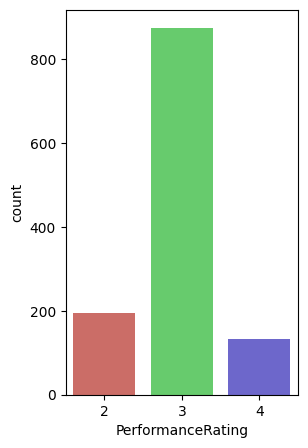

In [15]:
plt.figure(figsize=(3,5))
palette = sns.color_palette("hls", 3)
sns.countplot(x=data['PerformanceRating'],palette=palette)
plt.show()

* Most of the employee performnace rate is 3


-->Checking the distribution

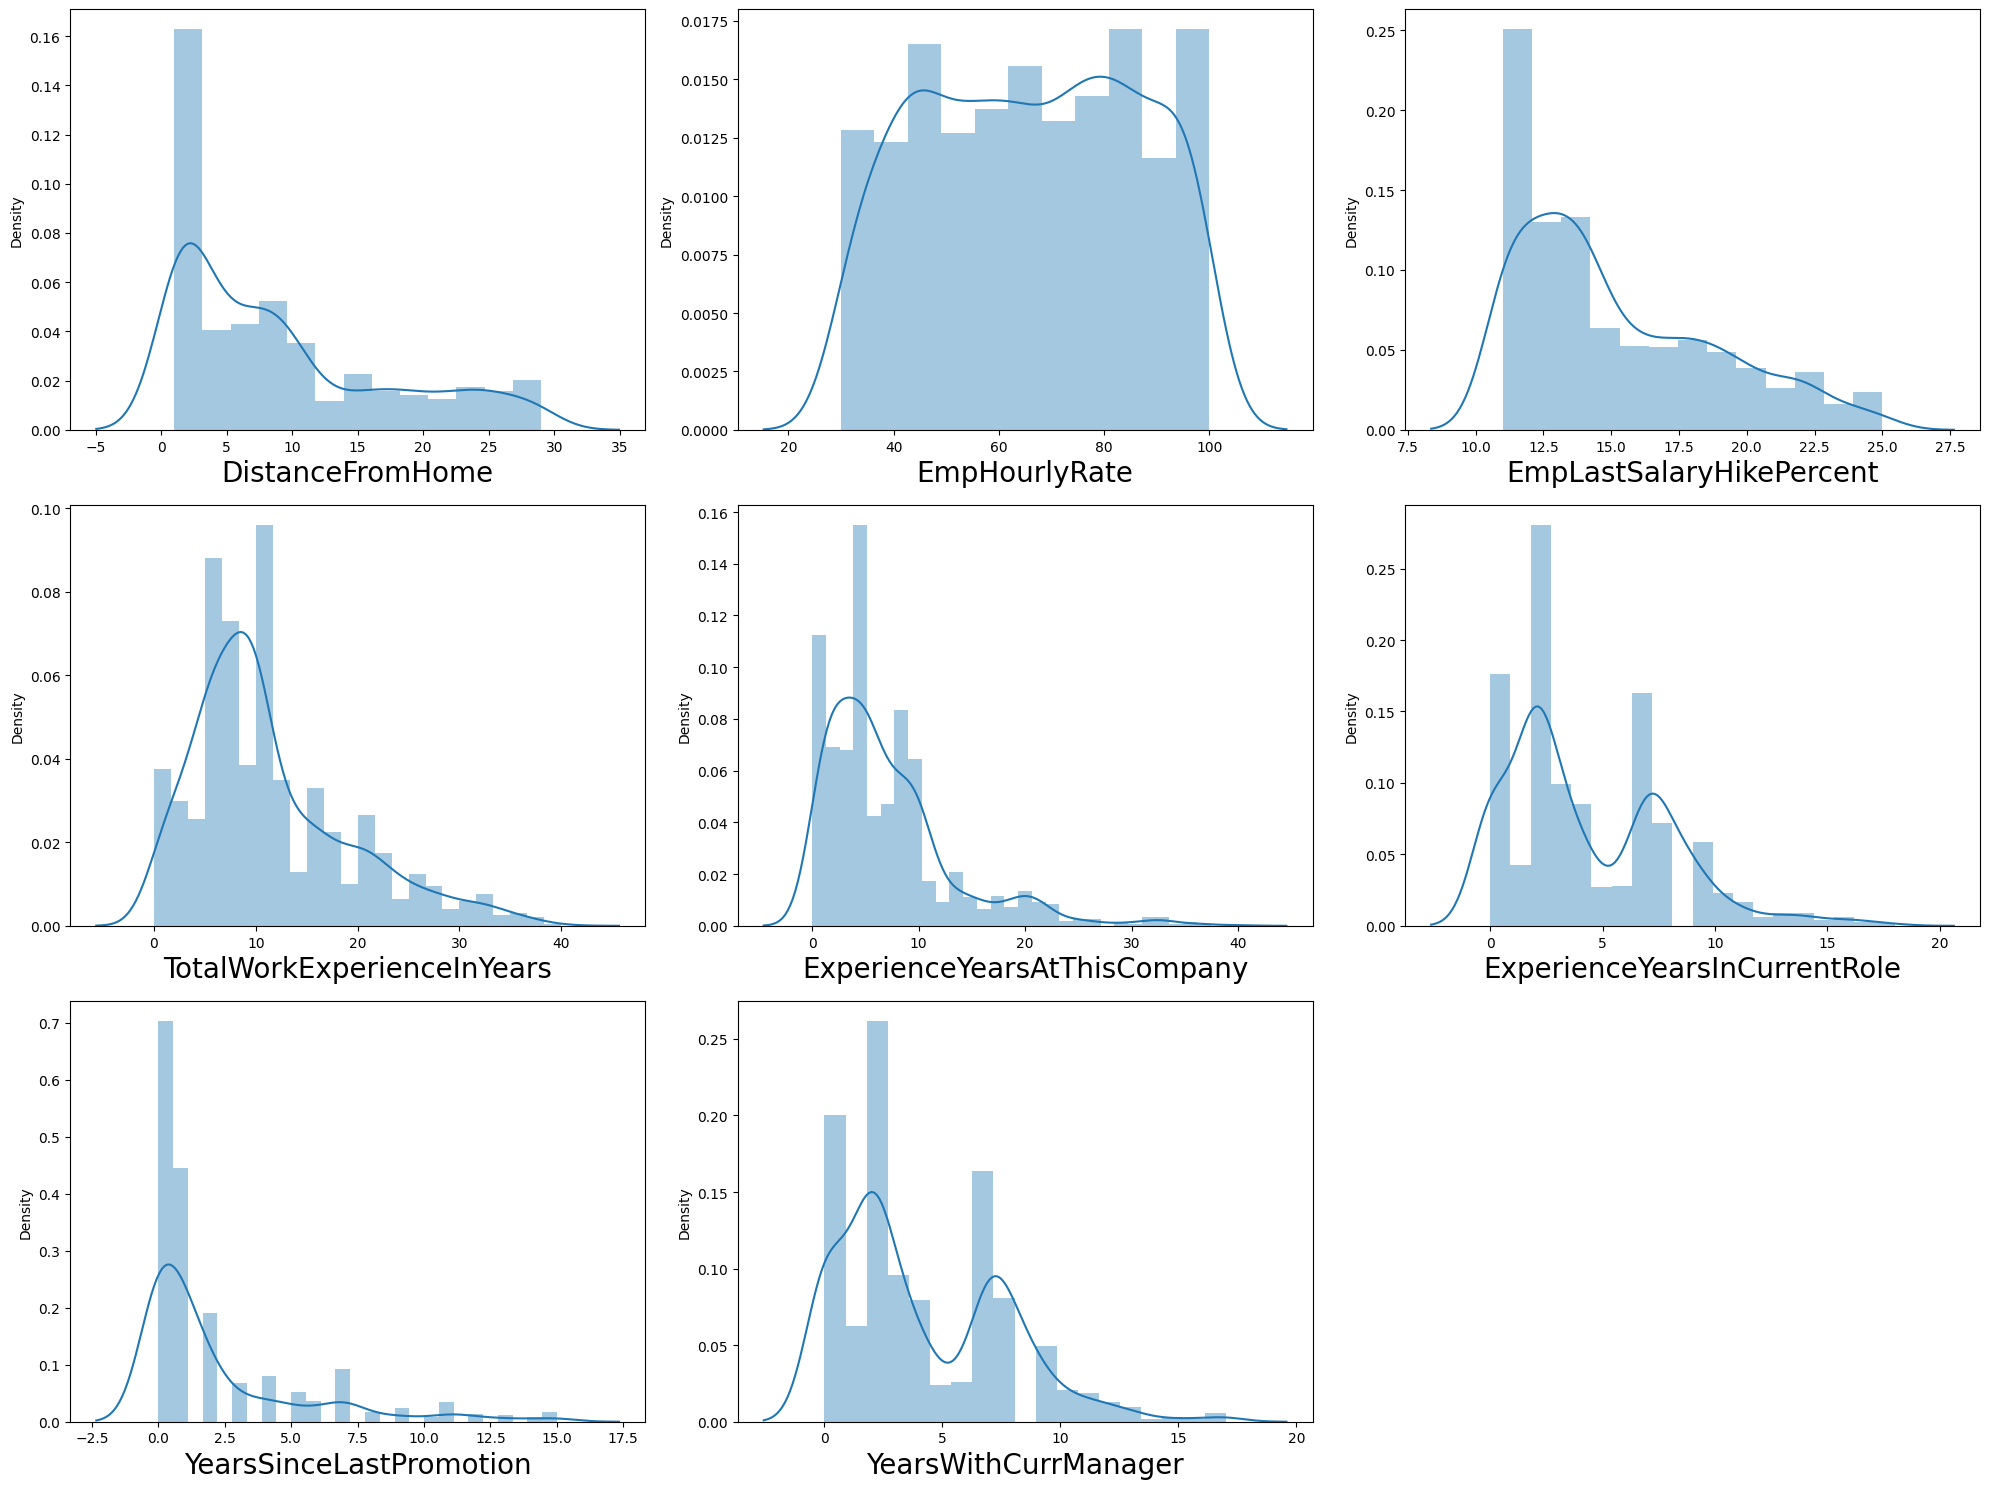

In [71]:
continuous = data[['DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
                   'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,15))
plotno = 1

for column in continuous:
    if plotno<=8:
        plt.subplot(3,3,plotno)
        sns.distplot(x=continuous[column])
        plt.xlabel(column,fontsize=20)
    plotno+=1
plt.tight_layout()
plt.show()

* Most features are skewed to right side

In [16]:
Num_clms=data[['Age', 'DistanceFromHome', 'EmpHourlyRate', 'NumCompaniesWorked','EmpLastSalaryHikePercent', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear','ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
          'YearsSinceLastPromotion', 'YearsWithCurrManager']]
ordinal=data[['EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'EmpRelationshipSatisfaction', 'EmpWorkLifeBalance', 'PerformanceRating']]

In [17]:
cat_features=data.select_dtypes(include='O')
cat_features=cat_features.drop('EmpNumber',axis=1)
cat_features

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
0,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
1,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
2,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes,No
3,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No,No
4,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
...,...,...,...,...,...,...,...,...
1195,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,Yes,No
1196,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,No,No
1197,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,Yes,No
1198,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,No,No


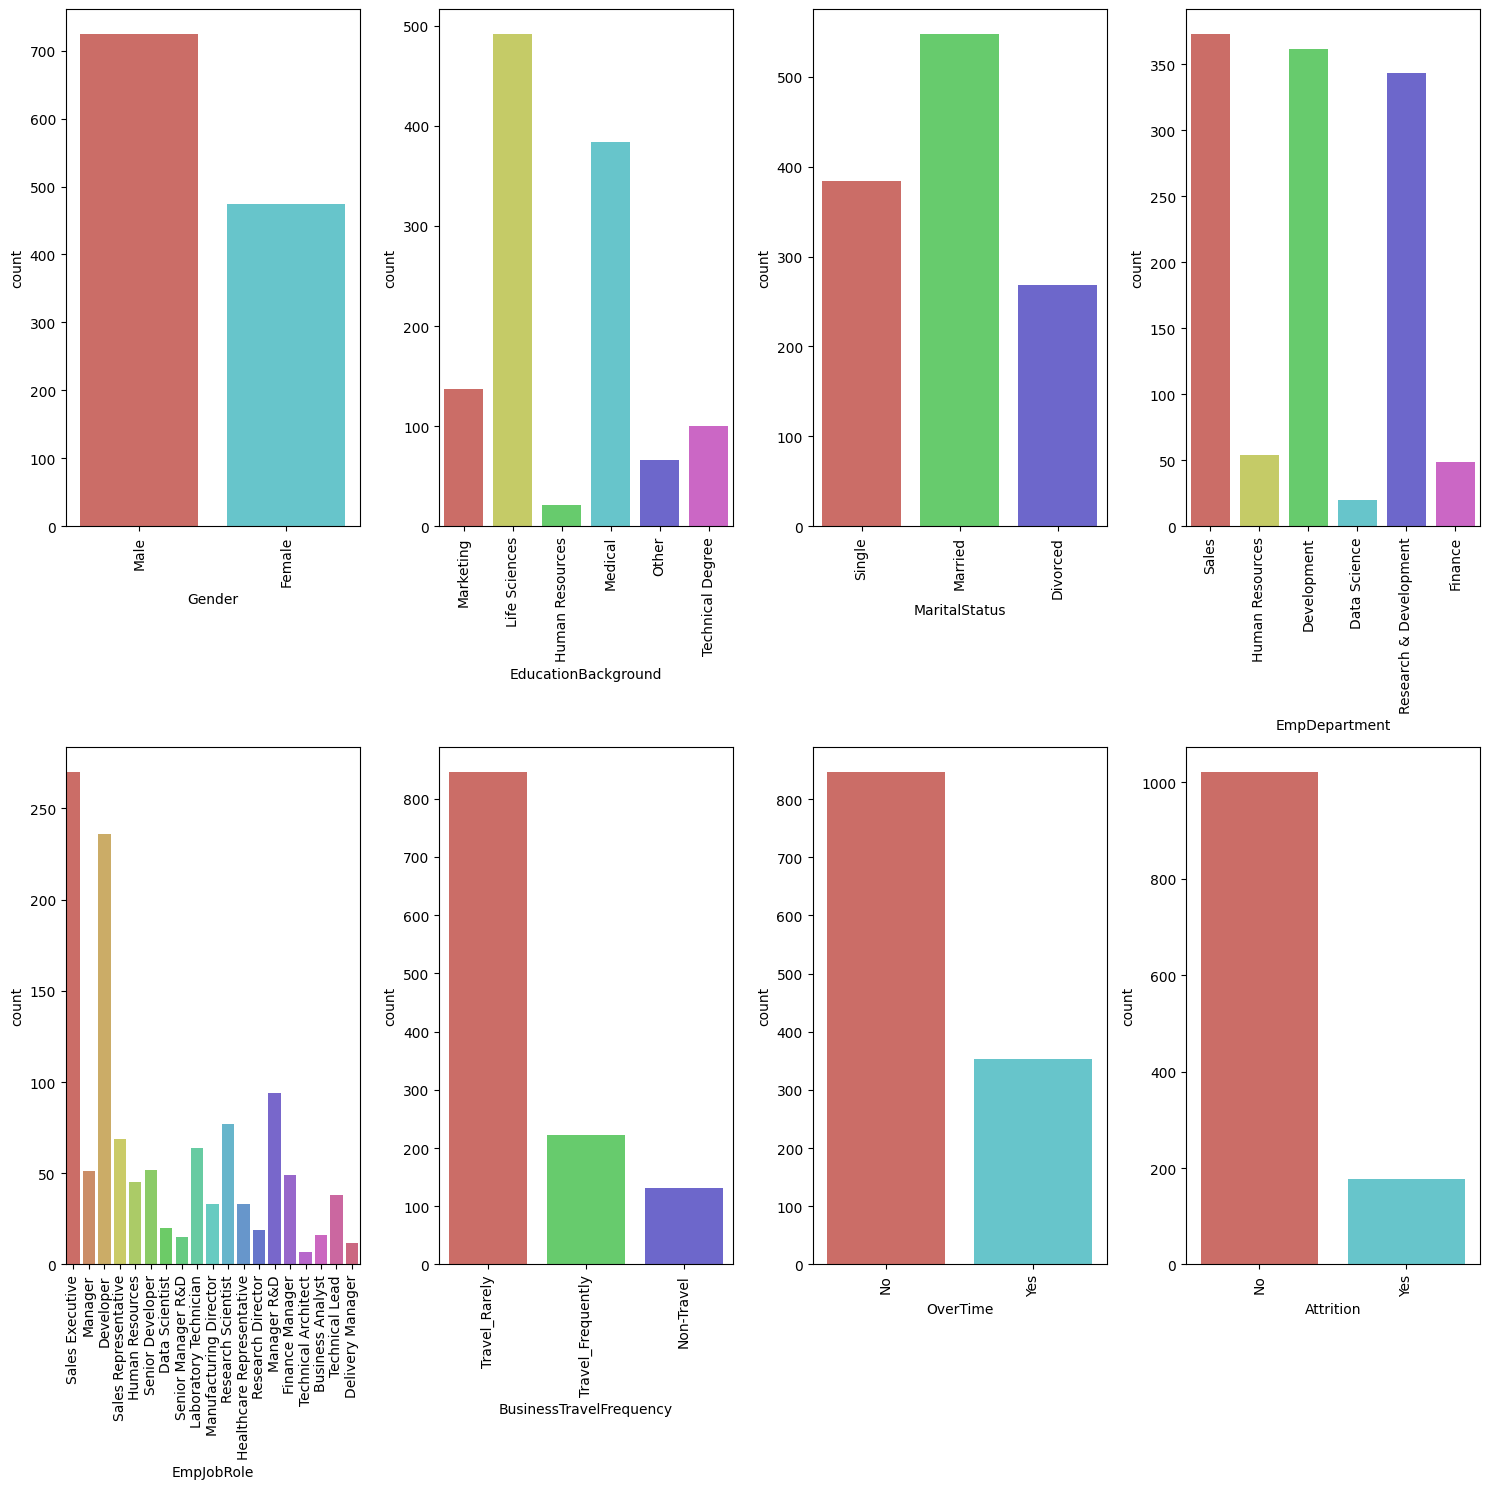

In [18]:
plt.figure(figsize=(15,15),facecolor='white')
plotnum=1
for c in cat_features:
    if(plotnum<=8):
        ax=plt.subplot(2,4,plotnum)
        sns.countplot(x=cat_features[c],palette='hls')
        plt.xlabel(c,fontsize=10)
        plt.xticks(rotation=90)


    plotnum+=1
plt.tight_layout()

* Gender: Most of the employees are male
* Education back ground: Most employees are from Life science and medical; least are from Human resource background
* Employee department:Most employees are working in sales, development,research&development department
* Employee Job Role: Most employees are working as Sales manager,Developer
* Business Travel Frequency : Most employees travel rarely for business purpose, less than 250 employees needs to travel frequently
* Overtime : Less than 350 people doing overtime work in the company
* Attrition: Most of the employee dosen't leave the company.Less than 200 employees are going to leave the company

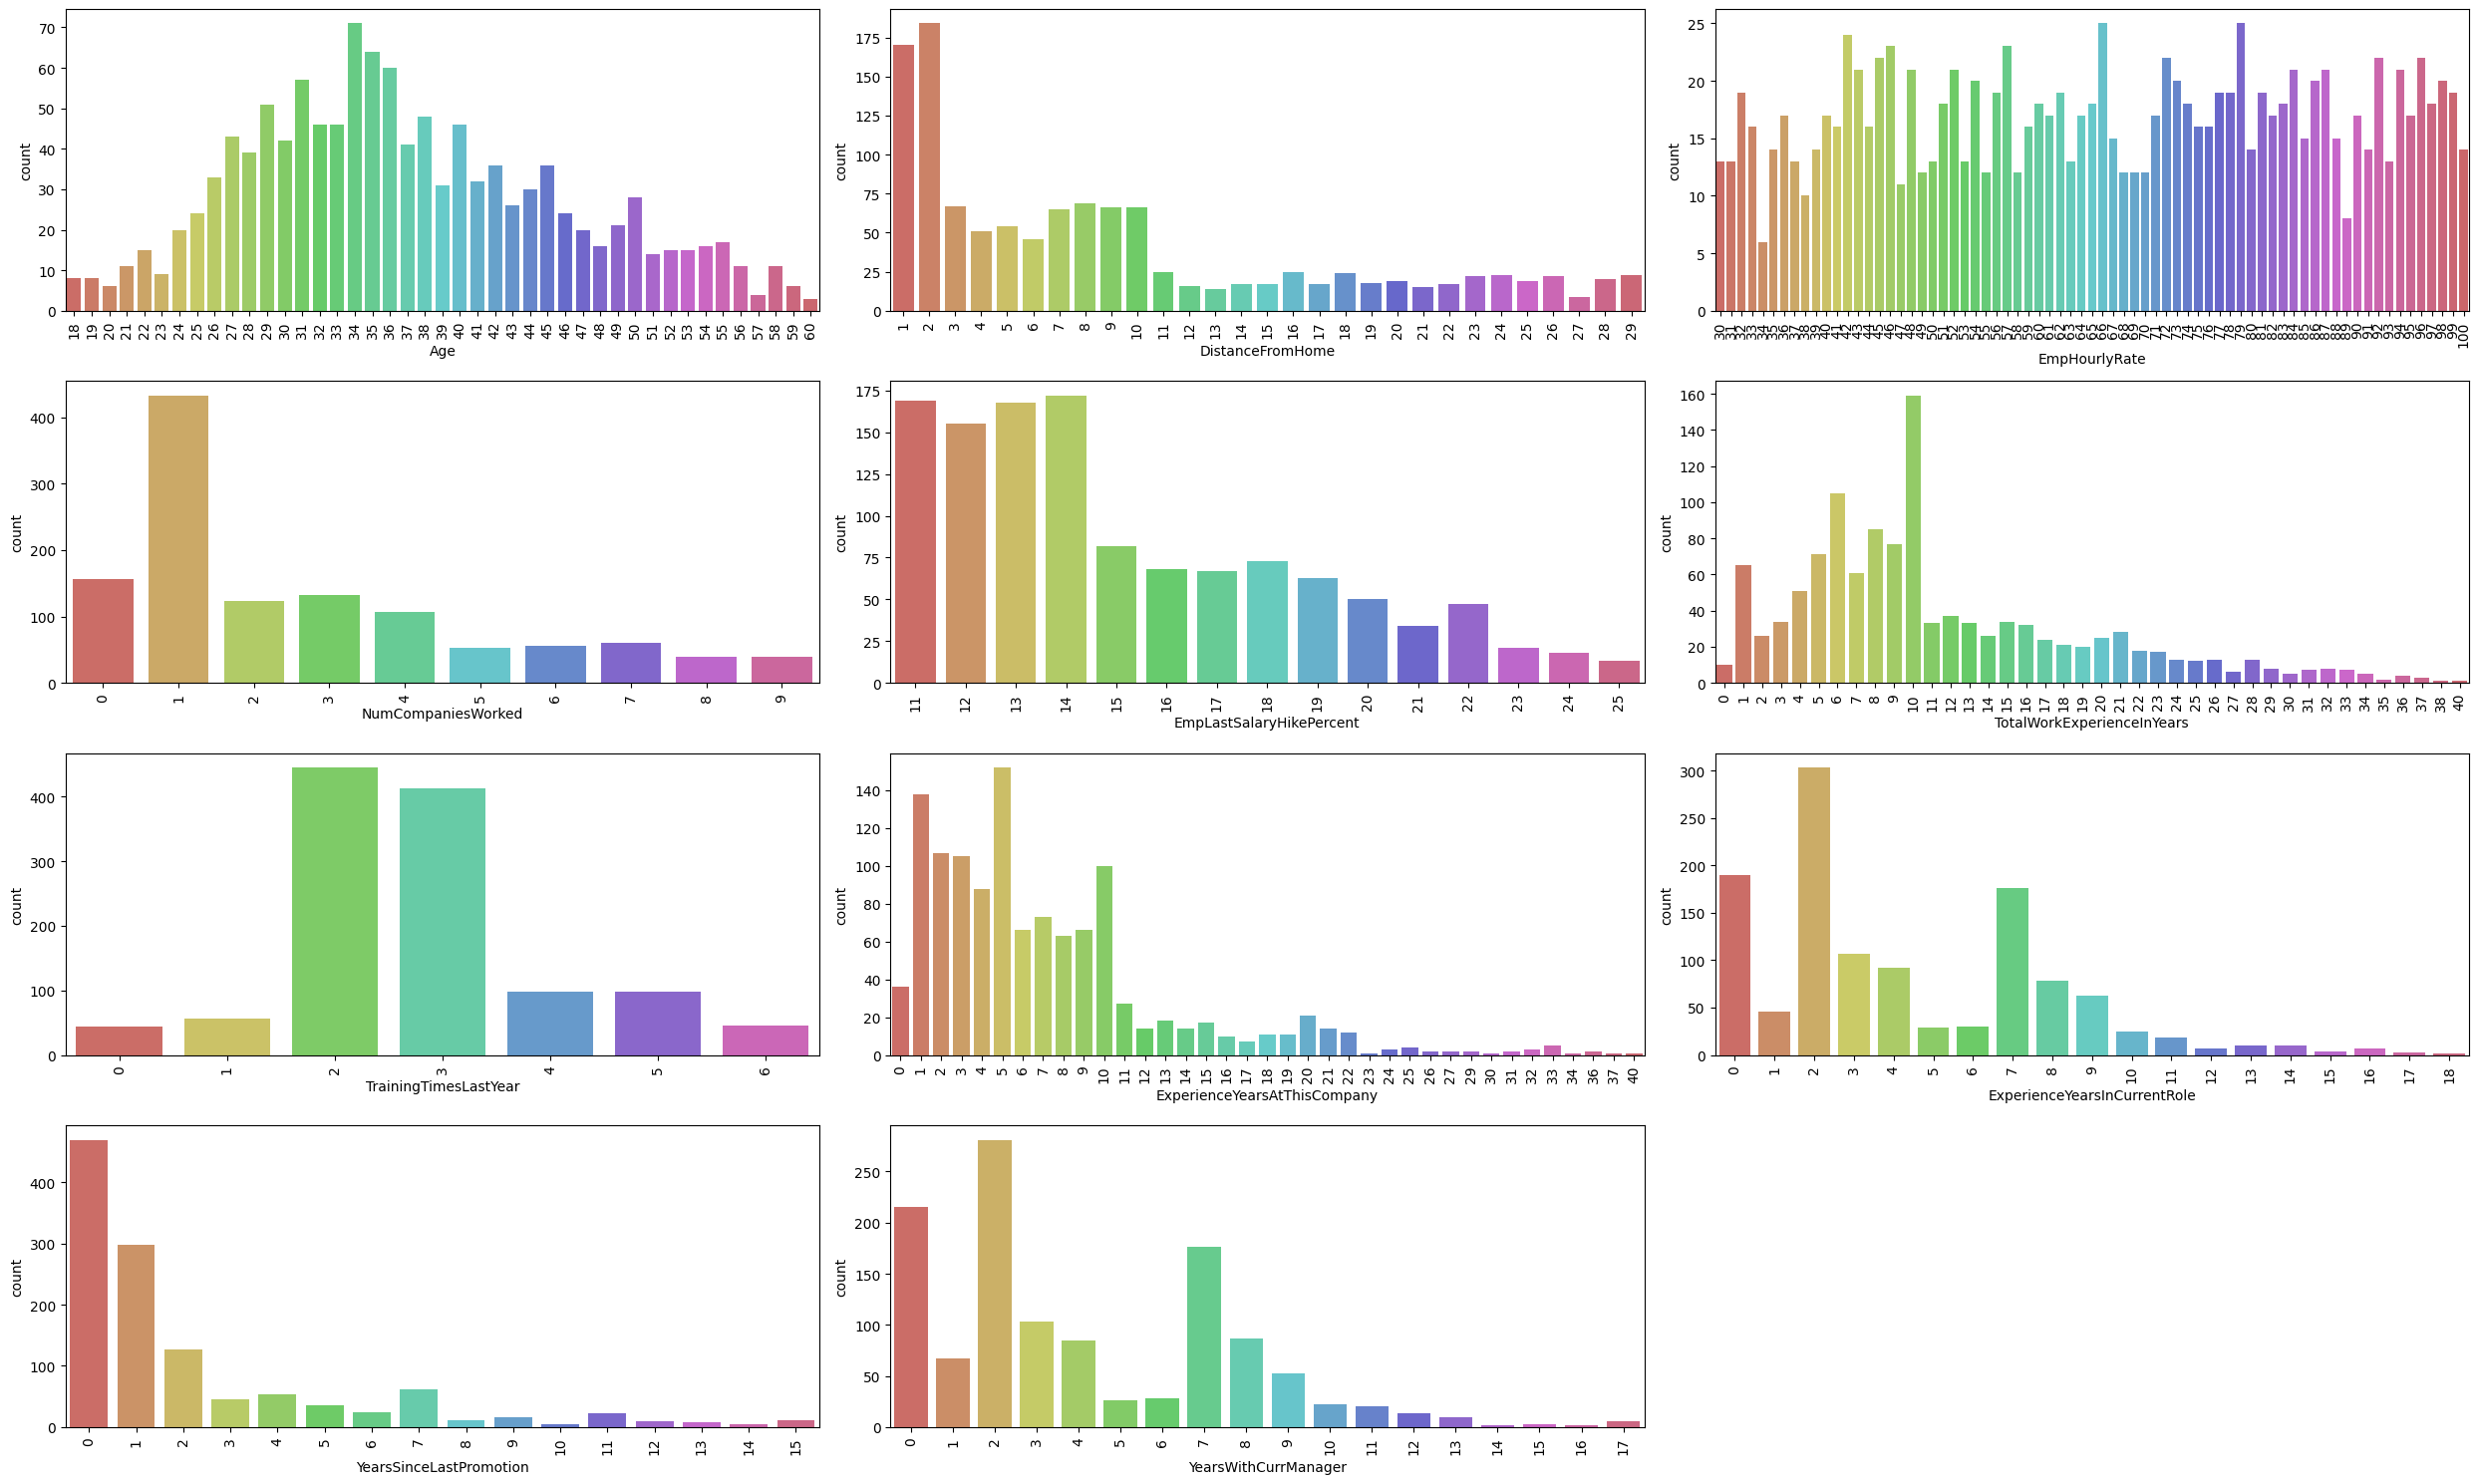

In [19]:
plt.figure(figsize=(25,15),facecolor='white')
plotnum=1
for c in Num_clms:
    if(plotnum<=12):
        ax=plt.subplot(4,3,plotnum)
        sns.countplot(x=Num_clms[c],palette='hls')
        plt.xlabel(c,fontsize=10)
        plt.xticks(rotation=90)


    plotnum+=1
plt.tight_layout()

* **Age** :most of the employees ages are in the range of 27 to 40
* **Distance From home**: Most of the employees from 10km distace radious
* **Number compines worked**: Most of the employees worked on 1 company.Less than 200 to 100 employees worked on 2,3,4 companies.Less than 100 employees worked on higherthan 5 companies
* **Employee last hike percentage**: Most employees last hike percentage rate is 11 to 14.Less than 75 employees have the hike percentage rate 15 to 25 respectively.
* **Total work expierence** : most employees total work expierence is 10,6,8
* **Traning Time Last year**:Most employee taining time is 2,4.Lessthan 50 employees doesn't have the training.And less than 100 employees attend the training morethan 4 times respectively.
* **Experience years at this company**: Most employees are having 1 to 10 year experience in this company.Some employees having 20 to 40 year experience in this company
* **Expiernce in current role** :  Most employees having 2,0,7 years of expiernce in current role.Less than 50 employees having more than 10 year expiernce for each year

* **Years sice last promotion**:Most of the employees has not promoted in last years;less than 300 employee has promoted atleast 1 year.
* **Years with current employee** :Most employee have 2 years with current manager and minimum 16 years with current manager; less than 180 employee has 7 years with current manager.Less than 50 employees have morethan 10 years with the same manager

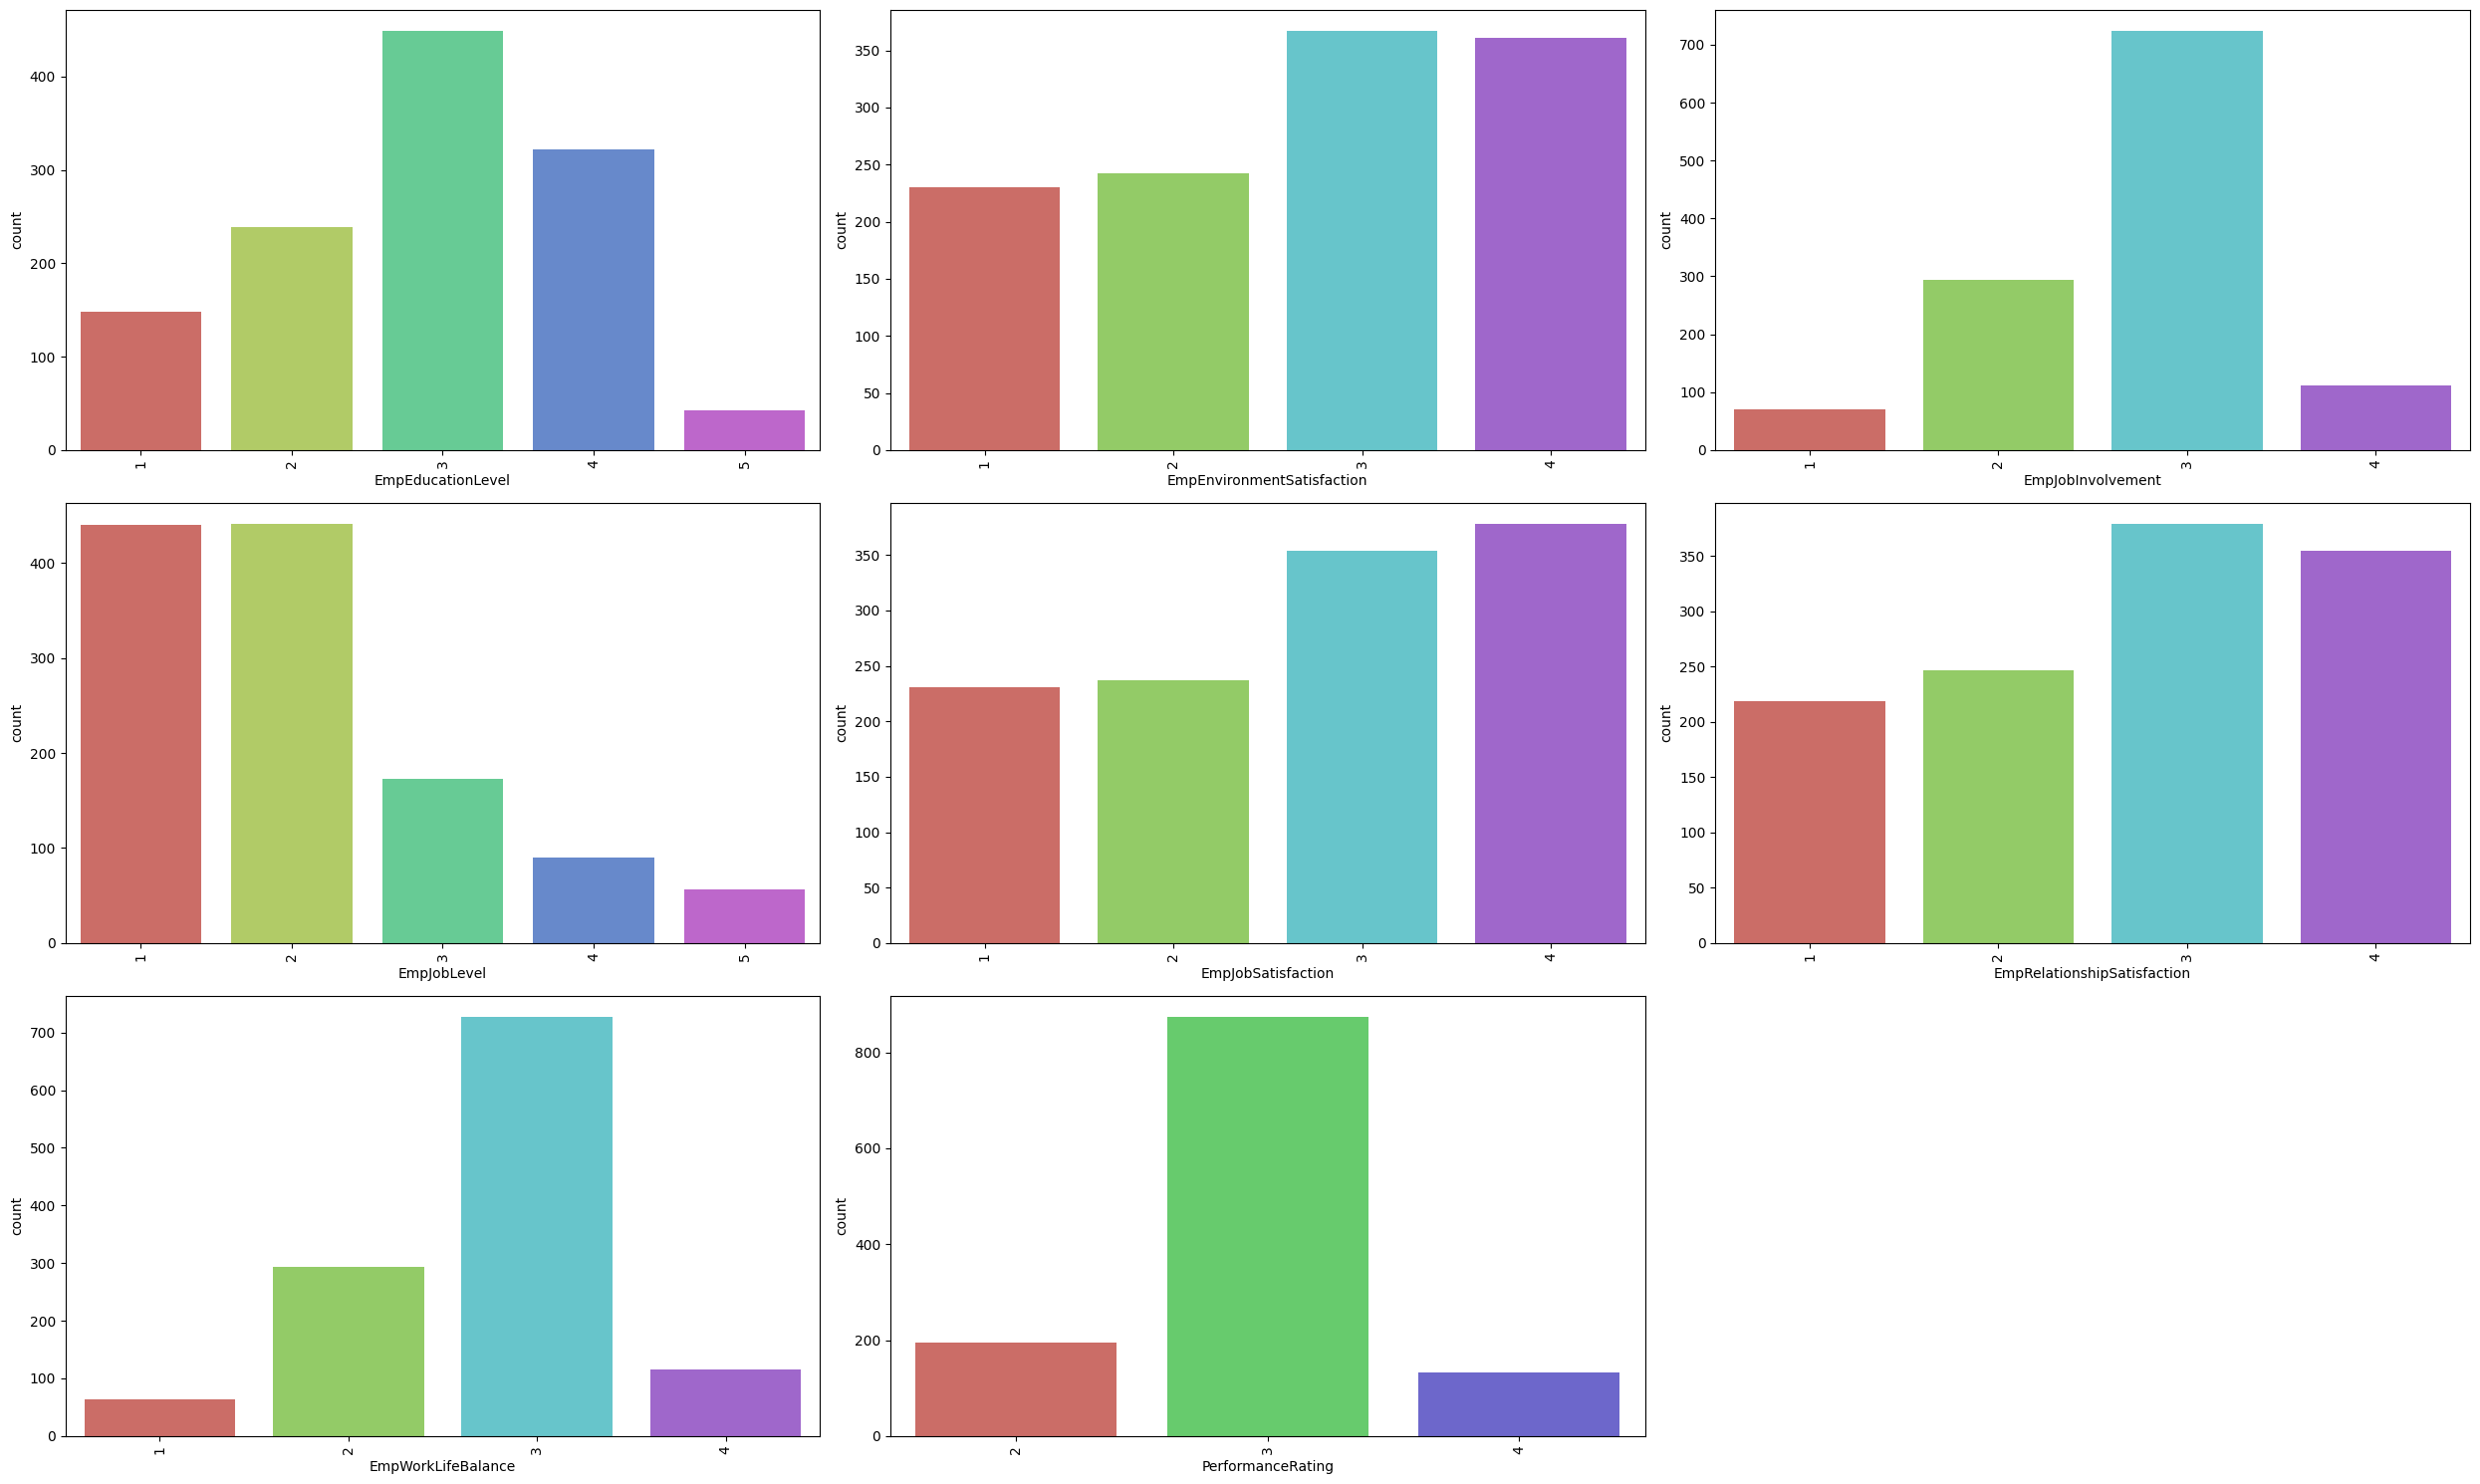

In [20]:
plt.figure(figsize=(25,15),facecolor='white')
plotnum=1
for c in ordinal:
    if(plotnum<=9):
        ax=plt.subplot(3,3,plotnum)
        sns.countplot(x=ordinal[c],palette='hls')
        plt.xlabel(c,fontsize=10)
        plt.xticks(rotation=90)


    plotnum+=1
plt.tight_layout()

* **Education Level**: Total range of employee education level is 1 to 5; And most employees are from level 3 & 4
* **Employee Enviornment Statification**: Total range is 1 to 4; Most of the employee statification is 4 & 3
* **Employee Job involment** : Most of employee job innvolment is 3
* **Employee Job Level**: Most of the employee job level is 1 and 2;Minimum number of job level is 5
* **Employee Job Statification** : Most of the employee job statification is 4 & 3
* **Employee Relationship Statification**: Total range is 1 to 4; Most of the employee relation statification is 3 & 4
* **Employee worklife Balance**: Most of the employee worklife balance rating is 3 ;next highest is 2;Less than 100 employees are rated it is as 1 and 4.
* **Performance rating** : Highest rating is 3 and less than 200


Bivariate analysis

Relation between categorical values and performance rating

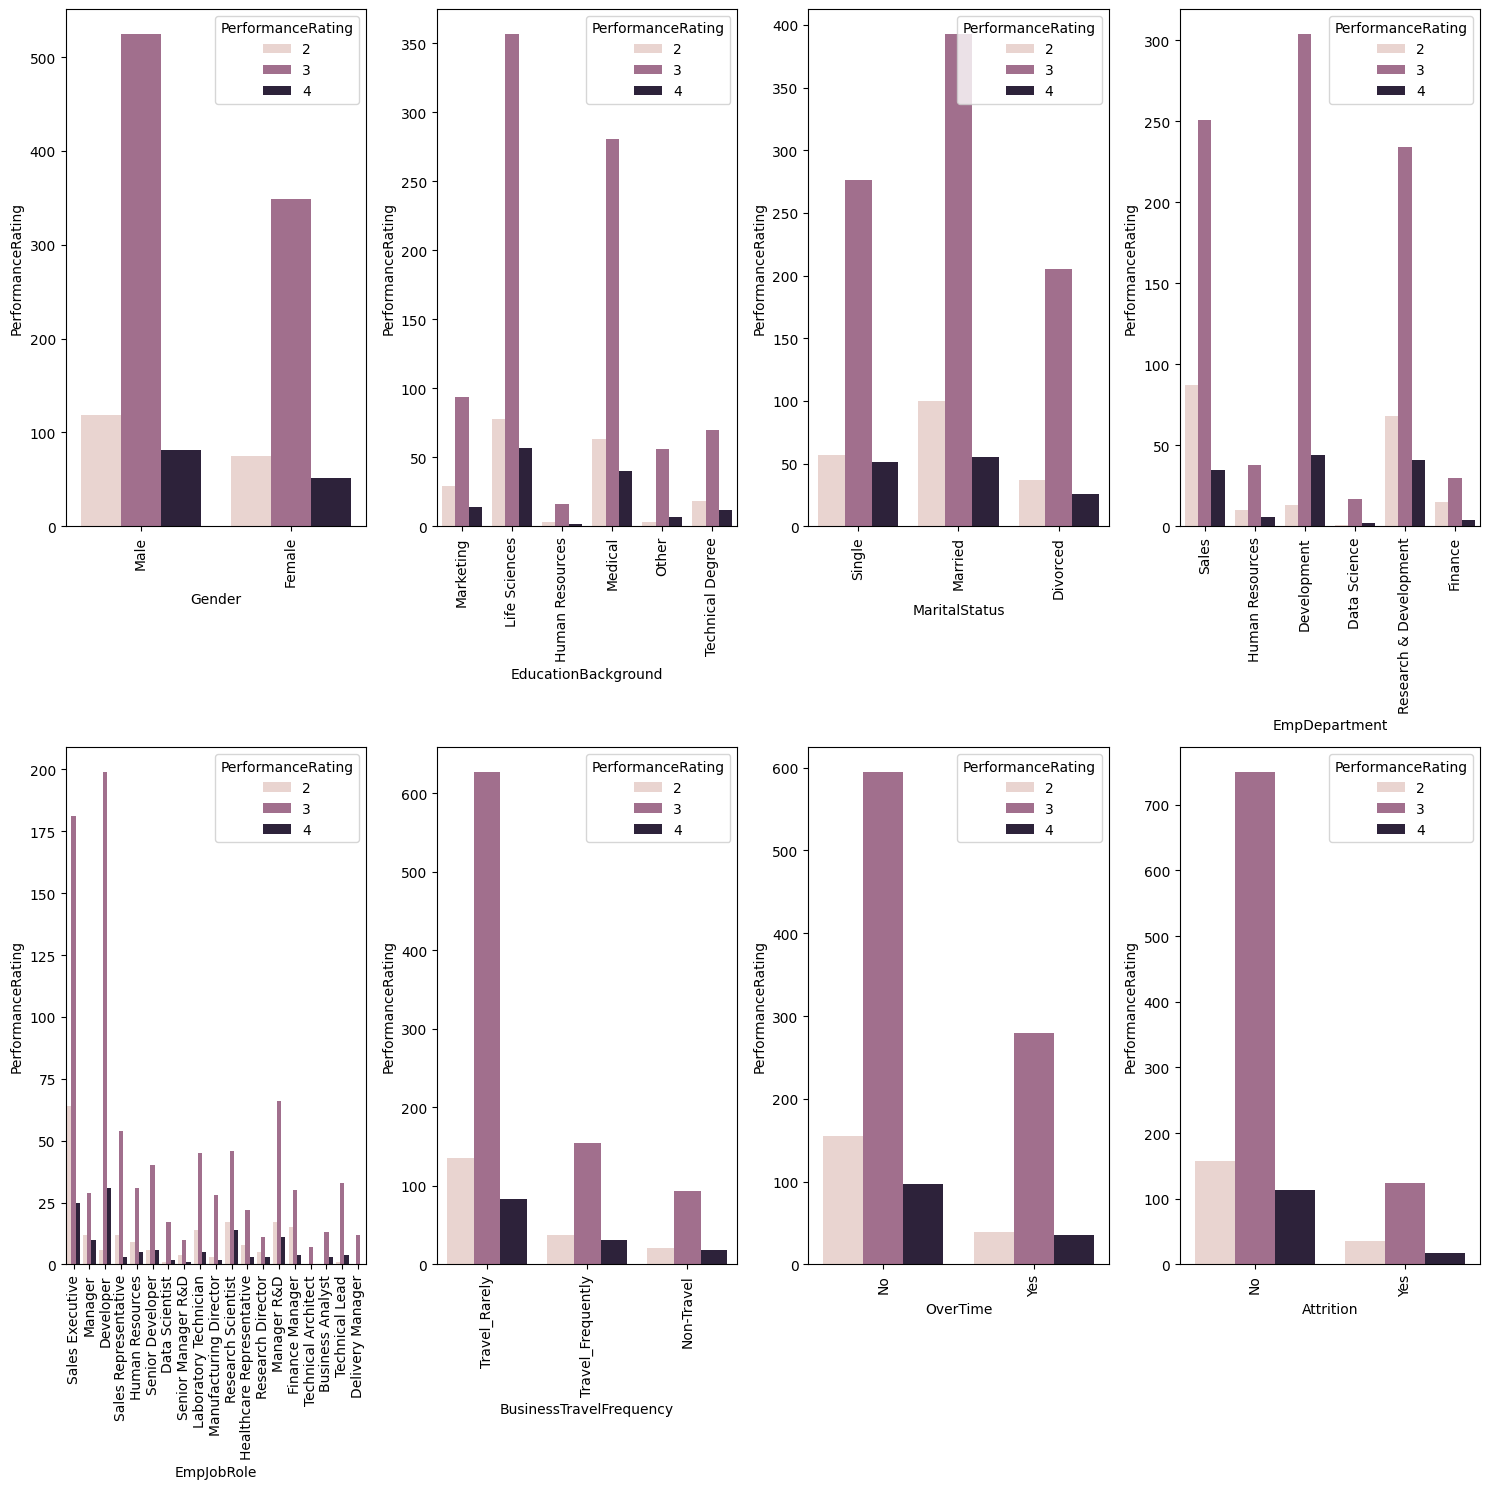

In [21]:
plt.figure(figsize=(15,15),facecolor='white')
plotnum=1
for c in cat_features:
    if(plotnum<=8):
        ax=plt.subplot(2,4,plotnum)
        sns.countplot(x=cat_features[c],hue=data.PerformanceRating)
        plt.xlabel(c,fontsize=10)
        plt.ylabel('PerformanceRating')
        plt.xticks(rotation=90)


    plotnum+=1
plt.tight_layout()

* **Relationship between Gender and performance rating**

 Maximum no of male and female rated with 3 performance rating.Four performance rating in both male & female is less
* **Relationship between EducationBackground and performance rating**

 Maximum life sciences and medical education background employee rated with 3 performance rating ; life science and medical education background employee also rated with 2 & 4 performance rating most of the time

* **Relationship between MaritalStatus and performance rating**

 Most of the married,single,divorced martial status employee rated with 3 performance rating.In married marital status 2 performance rating emplyee is more than single or divorced.

* **Relationship between Employee department and performance rating**
  
  In sales and research & development department employees are having 2 performance rating morethan other department. In Datascience, Deveolpment depatment 2 rating is very less

* **Relationship between Employee job role and performance rating**
   Sales excutive,Research scientist,Financial Manager, Manager R&D,Manager job employees having  2 performance rating  more than other roles.

* **Relationship between Business Travel Frequency and performance rating**

  Maximum no of travel rarely employee has get 3 performance rating
  Those employee travel frequentaly this employee also rated with 2, 3, and 4

* **Relationship between Overtime and performance rating**

  Maximum no of employee with no overtime has rated with 3 perfomance rating.Over time employees  having 3 as high performance rarting also 2 and 4

* **Relationship between Attrition and performance rating**

  Most of the employee rated with 3 performance rating in no means(They are not leave the company).Those employee have 3 and 4 performace rating those also leave the company


taget column v/s numerical data

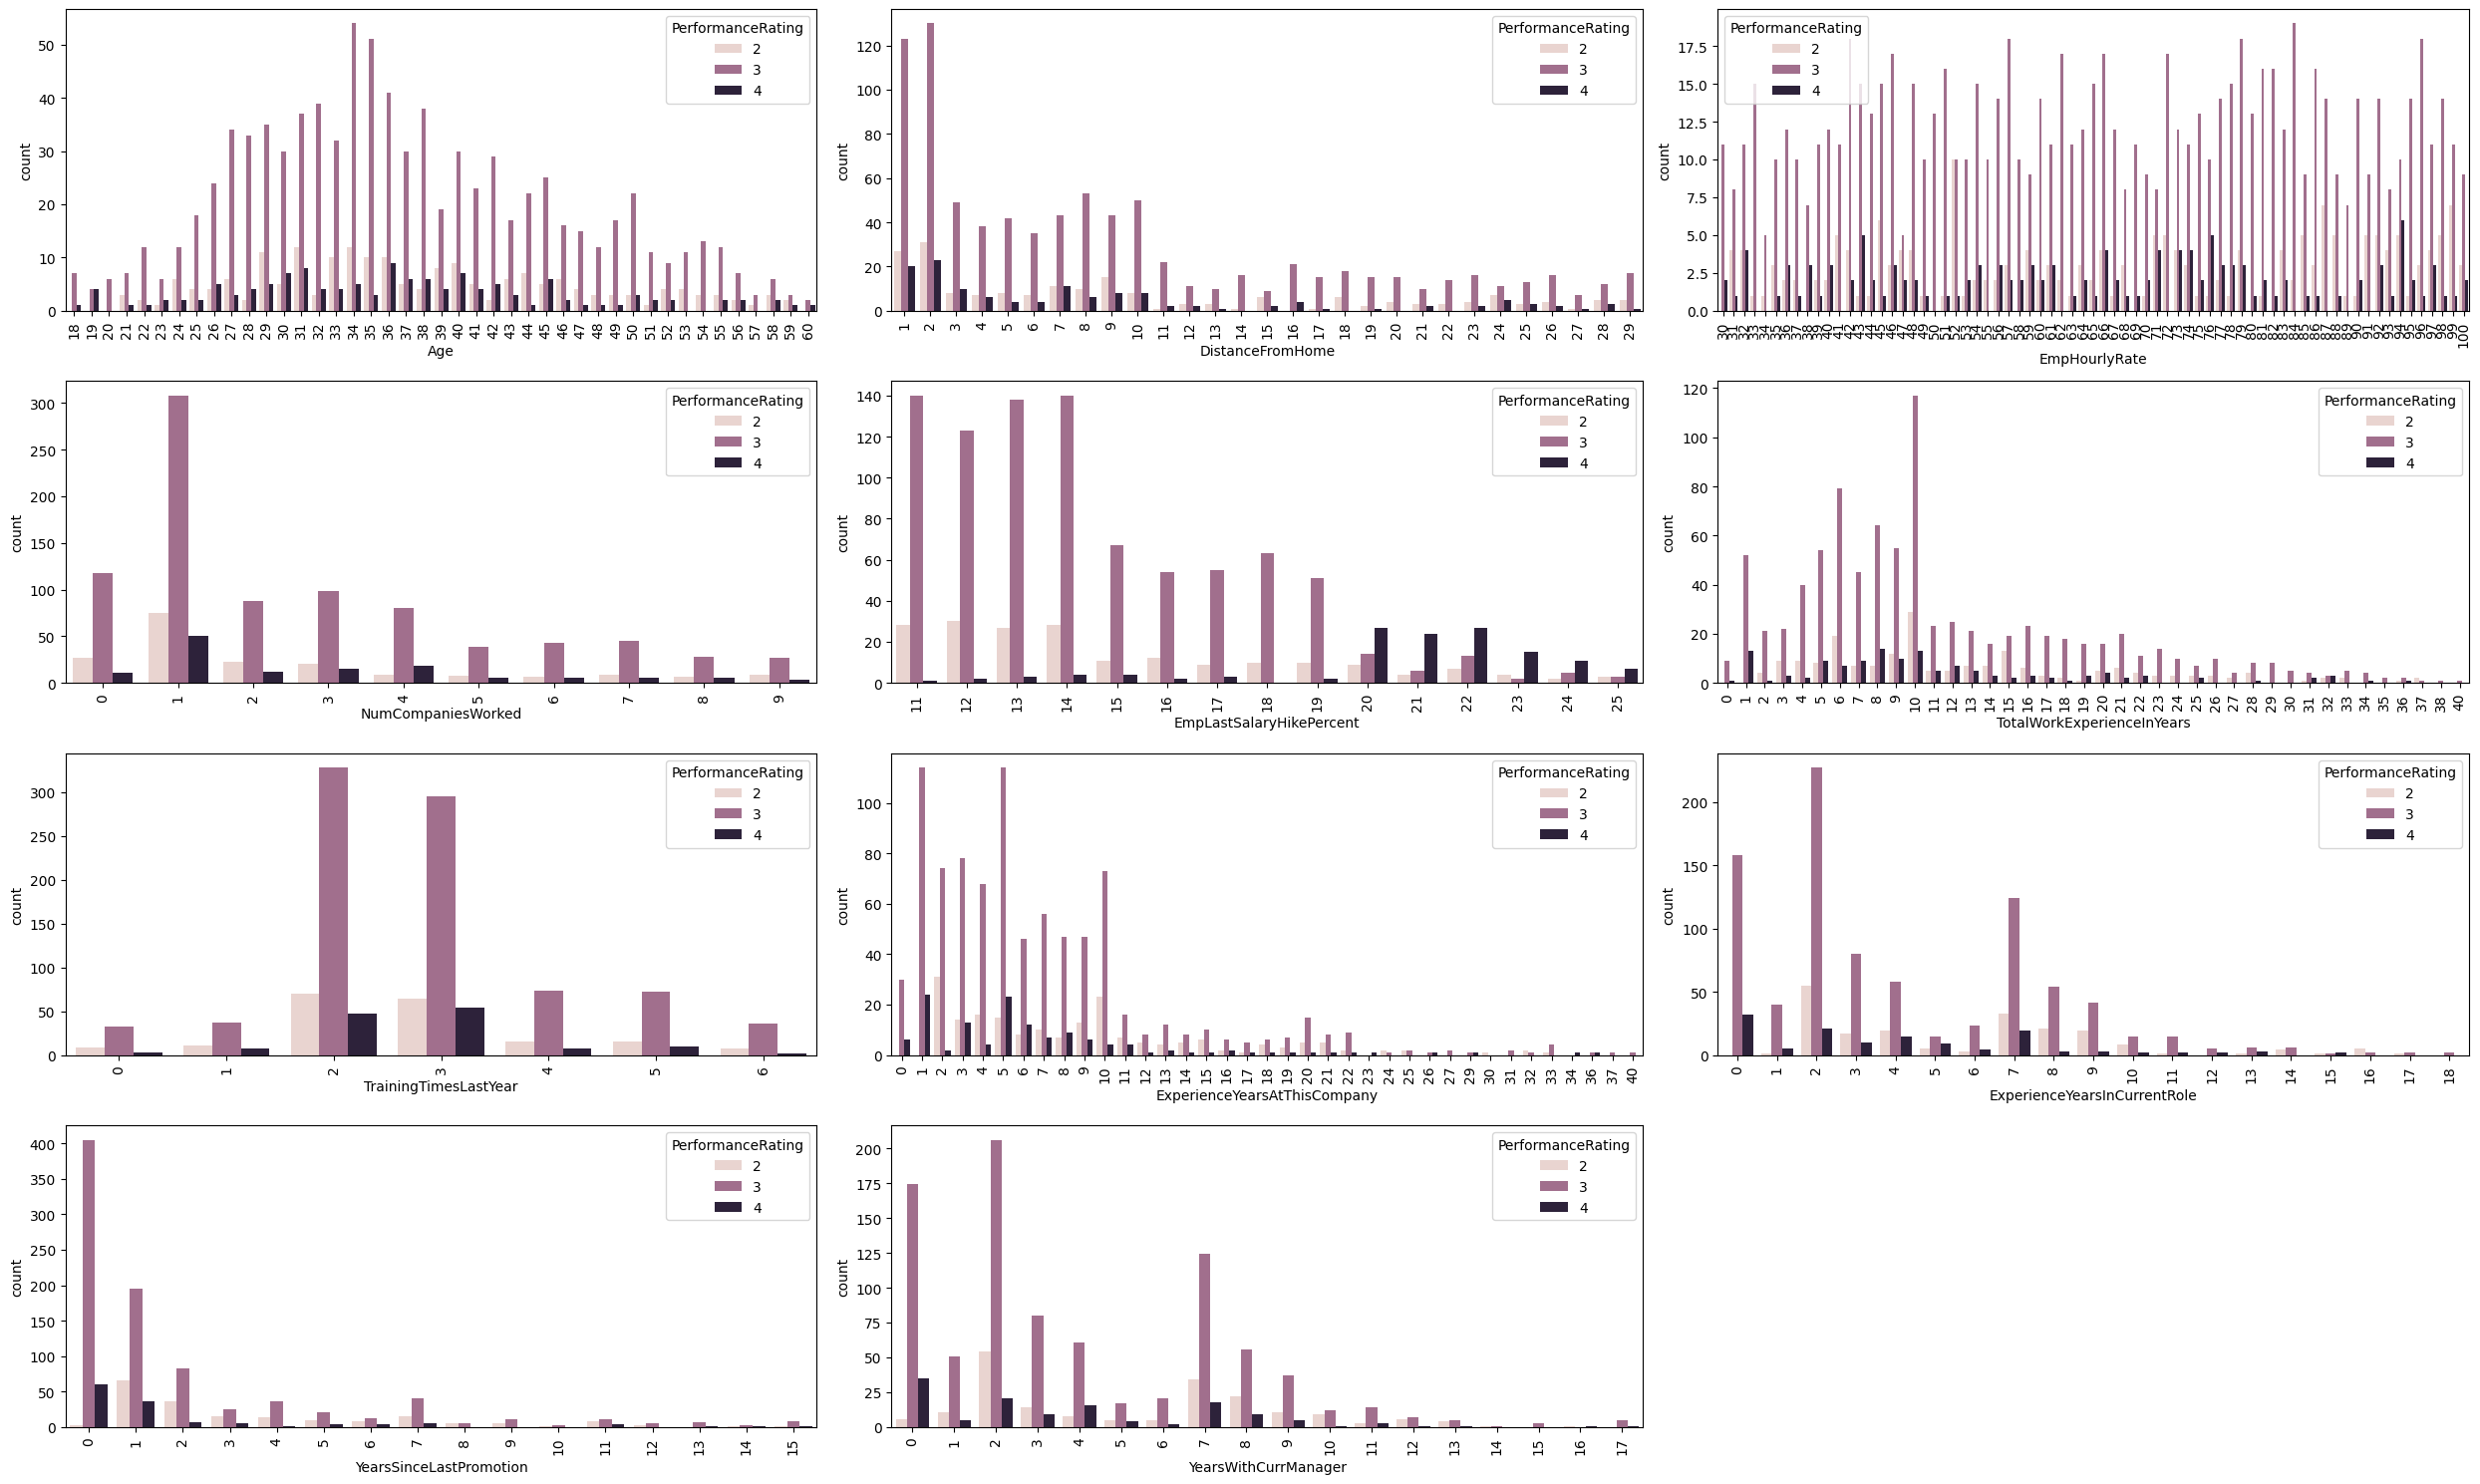

In [53]:
plt.figure(figsize=(25,15),facecolor='white')
plotnum=1
for c in Num_clms:
    if(plotnum<=12):
        ax=plt.subplot(4,3,plotnum)
        sns.countplot(x=Num_clms[c],hue=data.PerformanceRating)
        plt.xlabel(c,fontsize=10)
        plt.xticks(rotation=90)


    plotnum+=1
plt.tight_layout()

* in employee hike percentage where hike range 20 to 25 %  in there performance rating is high and most employees having 4 rating.


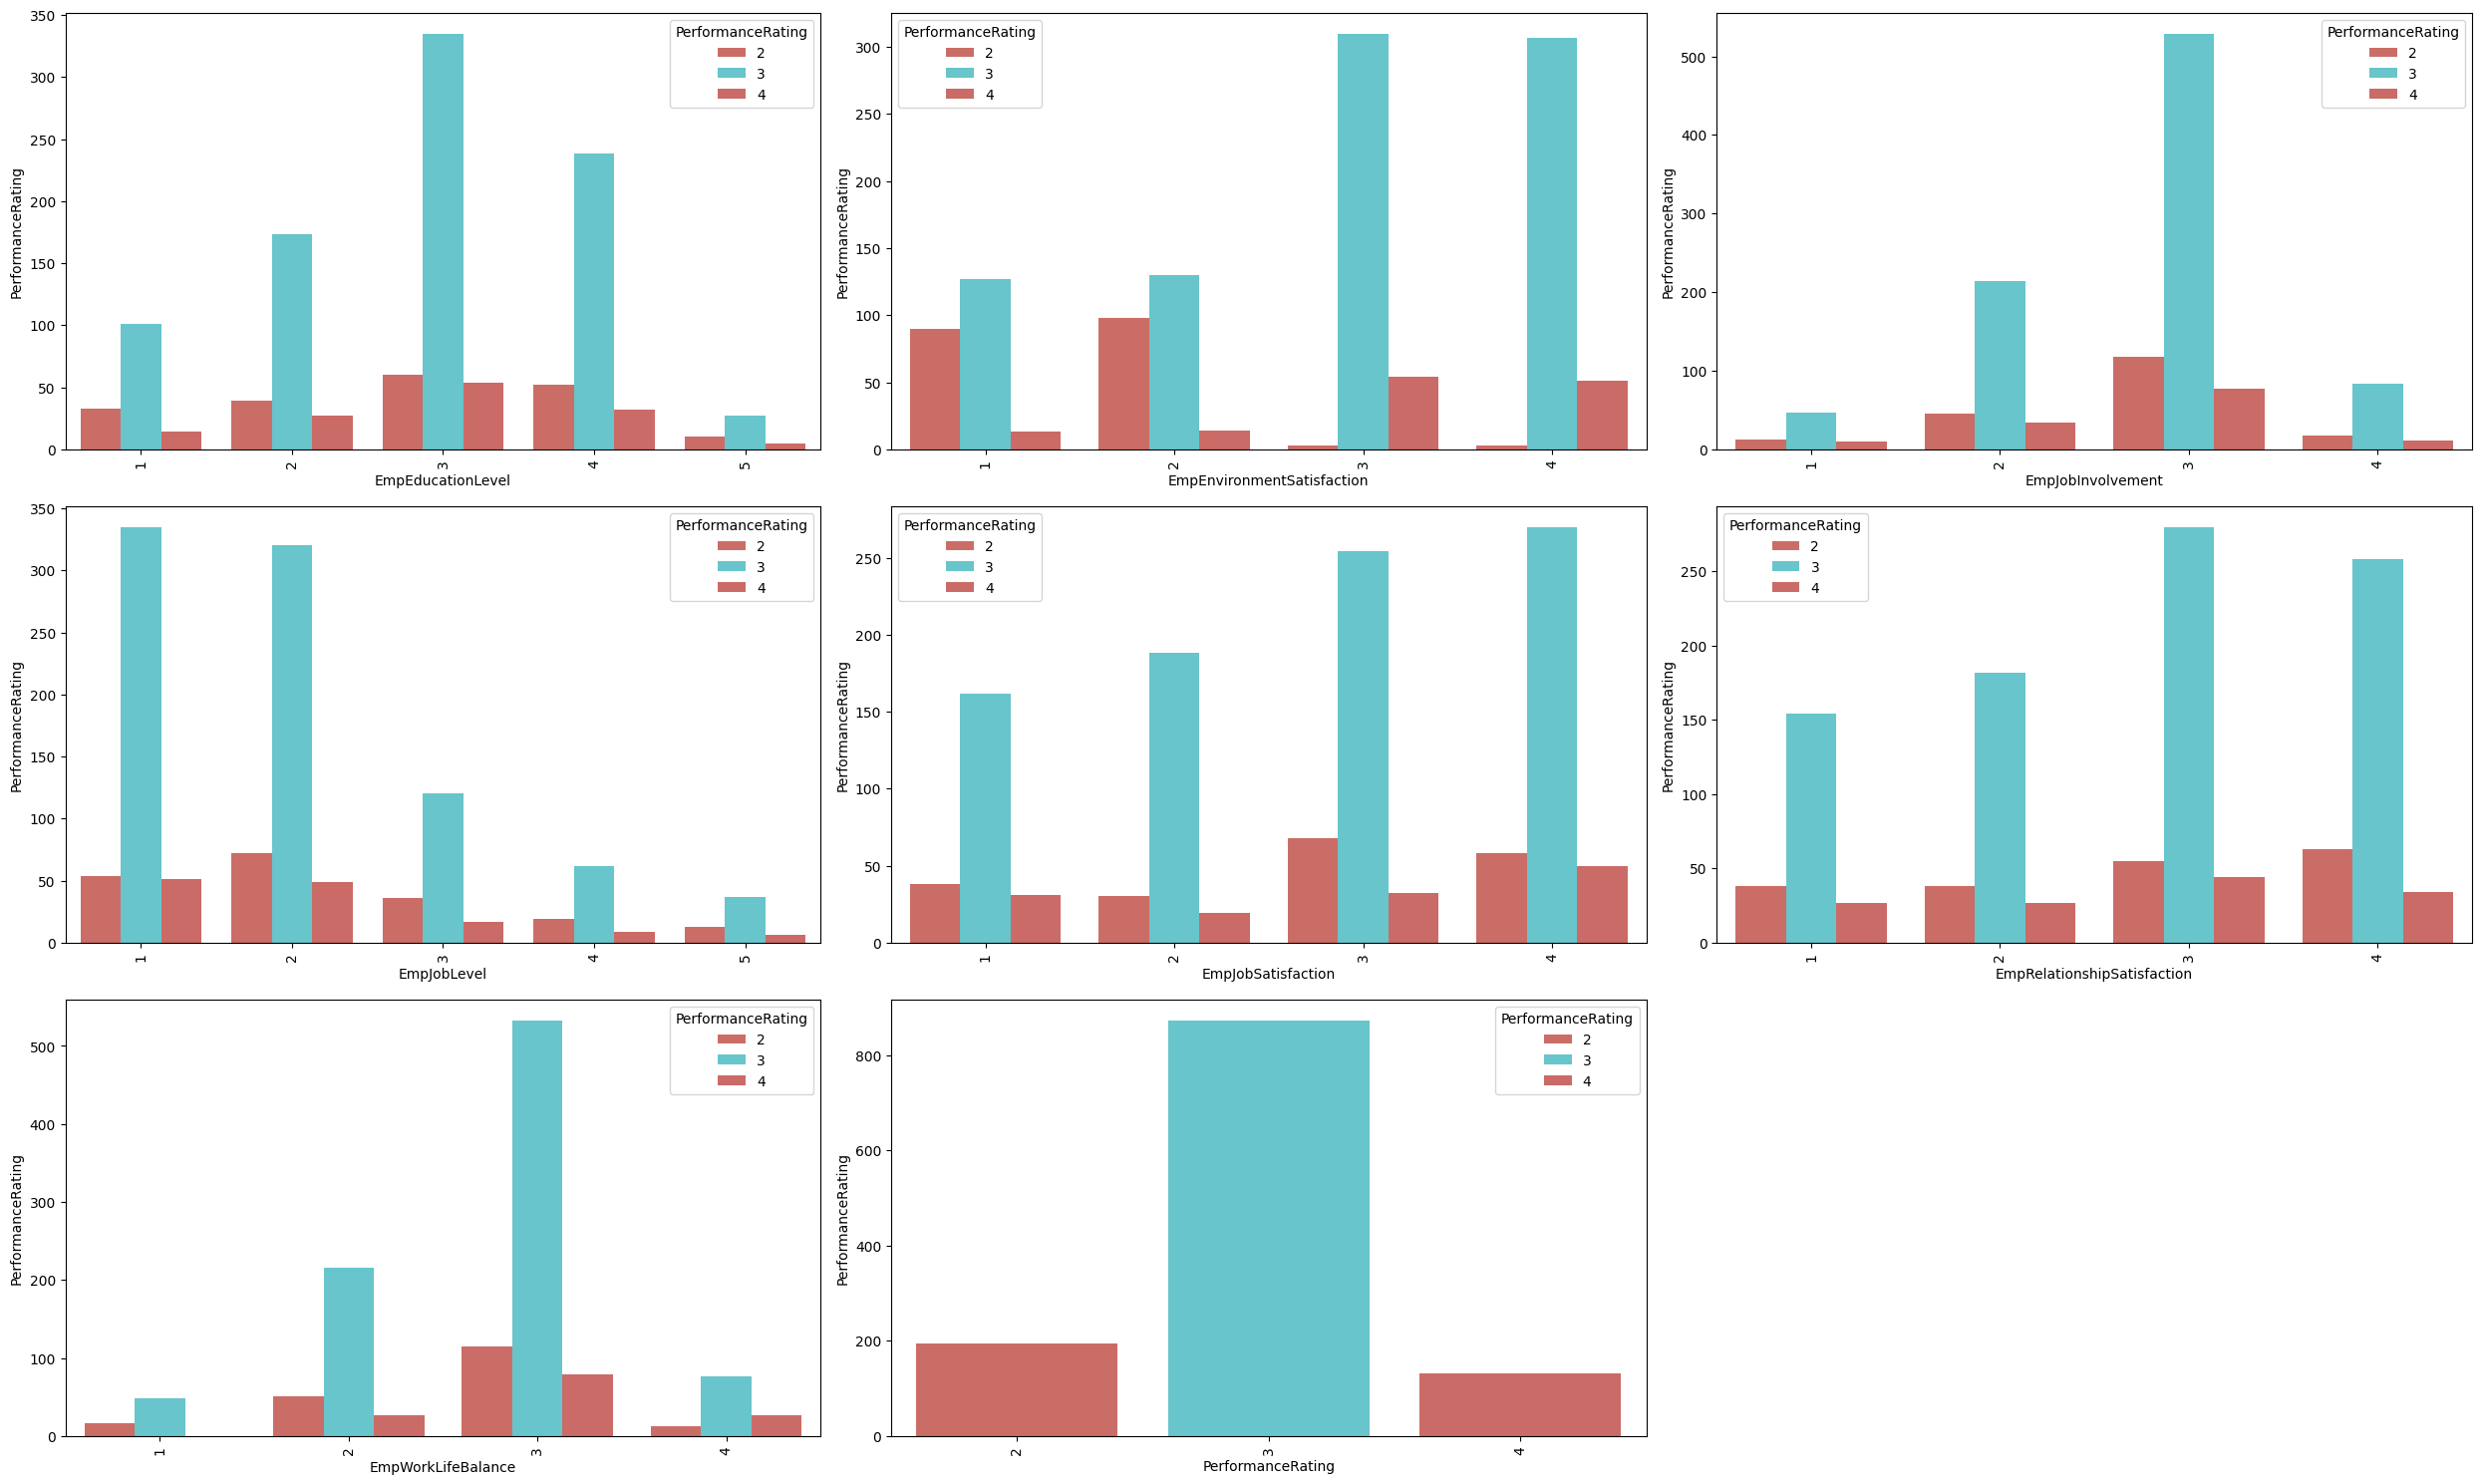

In [66]:
plt.figure(figsize=(25,15),facecolor='white')
plotnum=1
for c in ordinal:
    if(plotnum<=9):
        ax=plt.subplot(3,3,plotnum)
        sns.countplot(x=ordinal[c],hue=data.PerformanceRating,palette='hls')
        plt.xlabel(c,fontsize=10)
        plt.ylabel('PerformanceRating')
        plt.xticks(rotation=90)


    plotnum+=1
plt.tight_layout()

* Performance rating is high , as the employee are statisfied with the  
 environment
* Even in job statifaction employees who are statisfied with job also contains 2 as performance rating, also job statifaction also improves the performance rating
* employees who are not having work life balance as 1 there performance rating is 2&3; Good worklife balance employees are having mixed performance rating.


-->Employee salary hike percentage v/s Number of companies worked

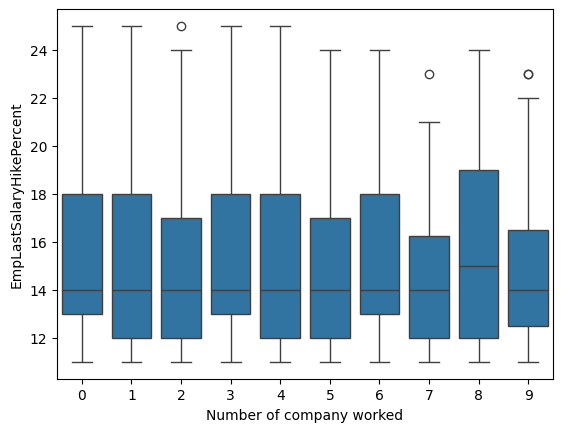

In [37]:
sns.boxplot(y='EmpLastSalaryHikePercent',x='NumCompaniesWorked',data=data)
plt.xlabel('Number of company worked')
plt.show()

* Apart from one, others hike median is 14 when comparing it with number of companies worked.

-->Distance from home v/s employee salary hike percentage

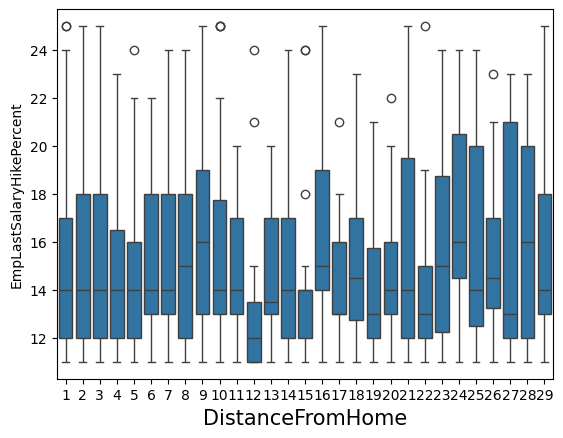

In [41]:
sns.boxplot(x='DistanceFromHome',y='EmpLastSalaryHikePercent',data=data)
plt.xlabel('DistanceFromHome',fontsize=15)
plt.show()

* Employees hike percentage is slightly increases for the employees whose traveling distance is higher.

Multivariate Analysis

-->Employee travel frequency v/s employee environment statification v/s performance rating

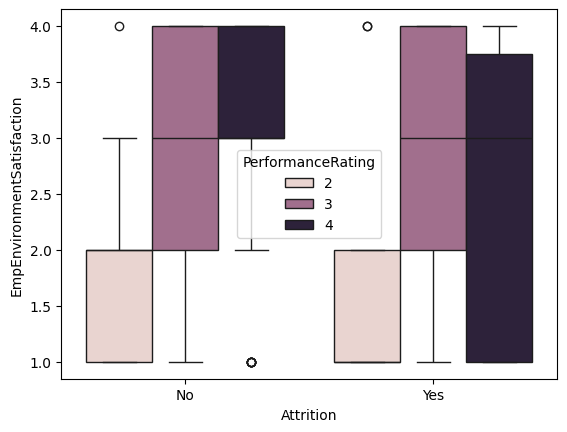

In [46]:
sns.boxplot(x='Attrition',y='EmpEnvironmentSatisfaction',hue=data.PerformanceRating,data=data)
plt.xlabel('Attrition')
plt.ylabel('EmpEnvironmentSatisfaction')
plt.show()

*  As Employee enivronment statification decrases the performance rating also decreses.But employees having 3 & 4 performance rating and also  having good rating for the working environment plans to leave the company

-->Employee travel frequency v/s employee job satisfaction v/s performance rating

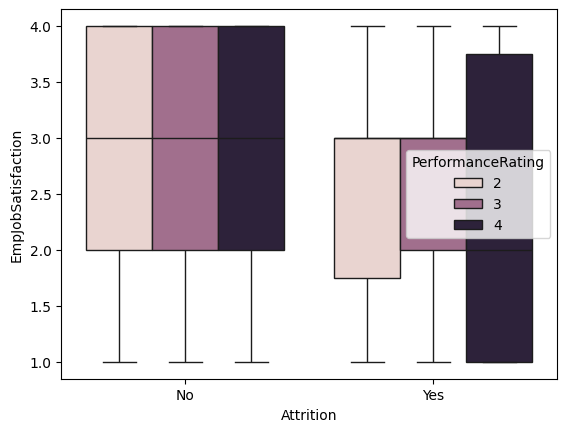

In [52]:
sns.boxplot(x='Attrition',y='EmpJobSatisfaction',hue=data.PerformanceRating,data=data)
plt.xlabel('Attrition')
plt.ylabel('EmpJobSatisfaction')
plt.show()

* The employees who are not statisfied with the job having performance rate 2&3 in attrition value yes(who are going to leave the company).Also some people whose having high job statifaction and performance rating planning to leave the company.
* Employee job satifiacation is  affecting the attrition

Educational background v/s experience in current role v/s performance rating

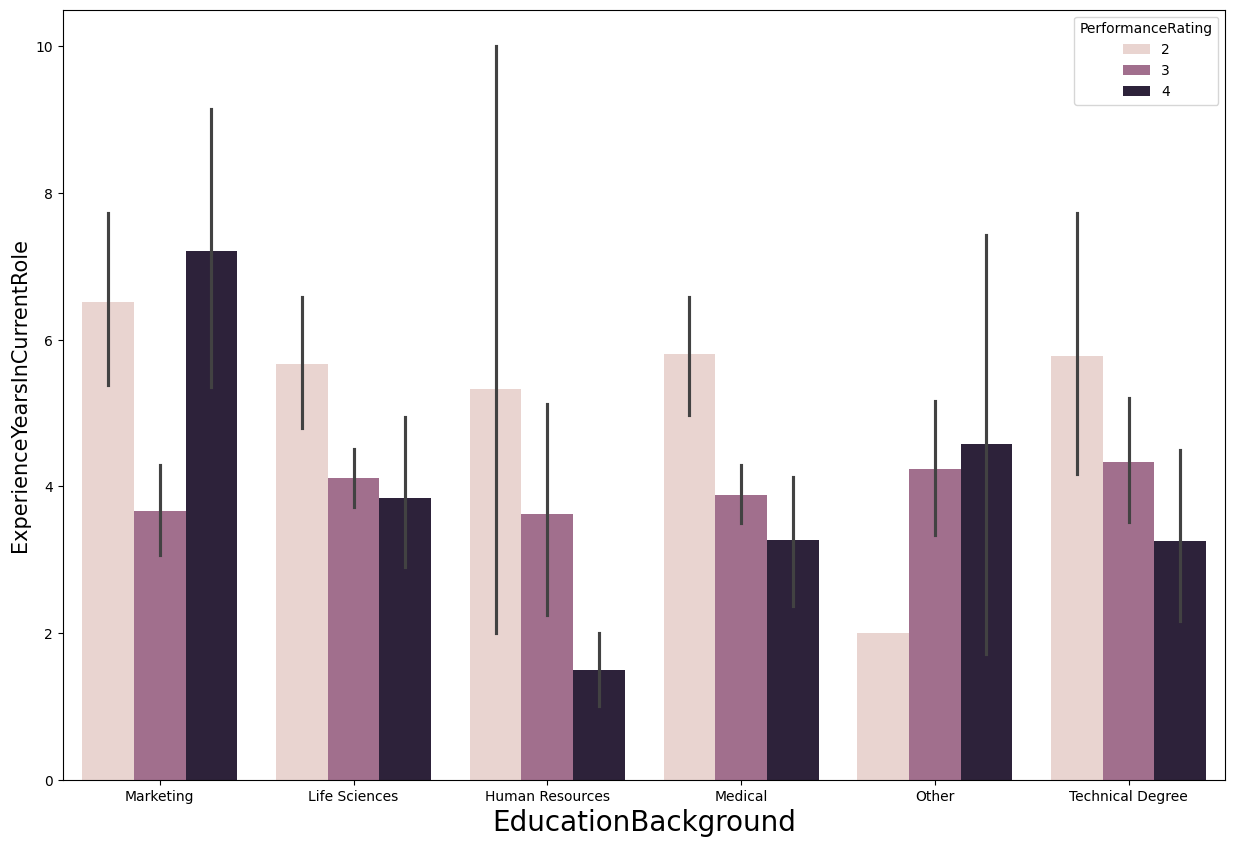

In [70]:
plt.figure(figsize=(15,10))
sns.barplot(x='EducationBackground',y='ExperienceYearsInCurrentRole',hue=data.PerformanceRating,data=data)
plt.xlabel('EducationBackground',fontsize=20)
plt.ylabel('ExperienceYearsInCurrentRole',fontsize=15)
plt.show()

* If the current role experiance is increses of marketing education background employee has 4 performance rating most of the time
* in Other education background performance rating increases as the experience in current role increases
* In life science, human resource, medical , technical degree background performance rating is high for the less experience employees in current role with comaprison of high experience employees in current role



# **Department Wise Performance Rating**

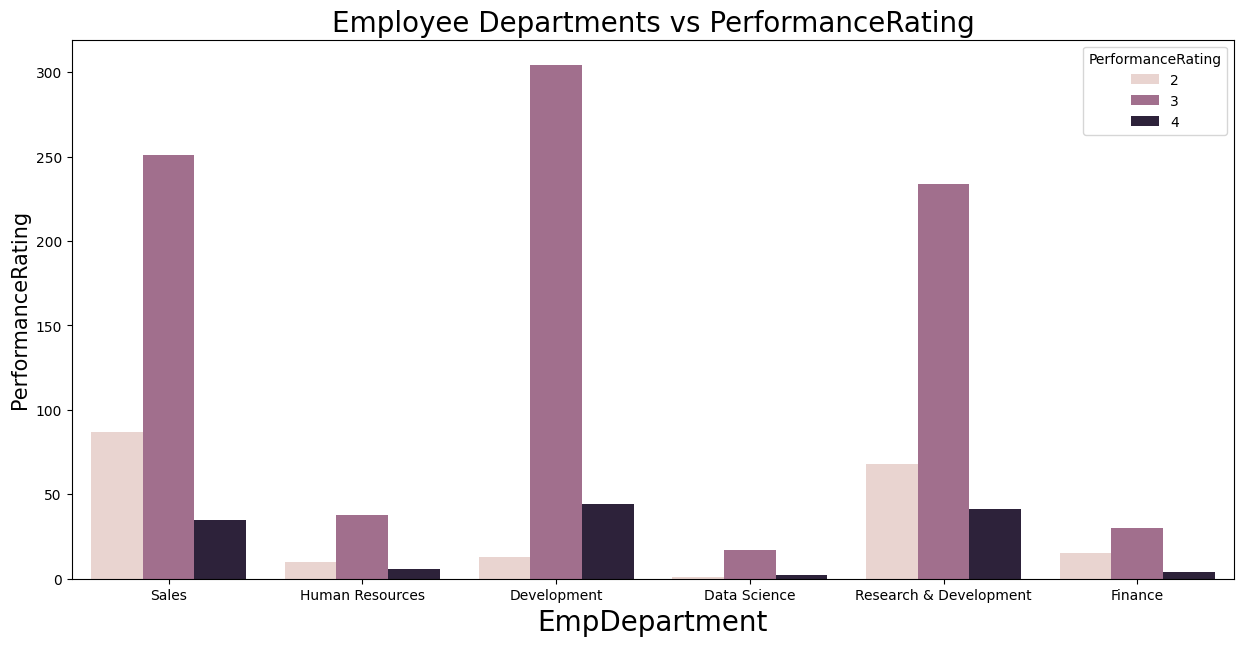

In [22]:
plt.figure(figsize=(15,7))
sns.countplot(x='EmpDepartment',hue=data.PerformanceRating,data=data)
plt.title('Employee Departments vs PerformanceRating',fontsize=20)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()

* From the above graphs we can conclude that Development department is showing High performance rating
* In all department highest performance rating is 3
* Finance department having high percentage of  2 performance rated employee more than others.

--> Department wise performing rate based on gender and age

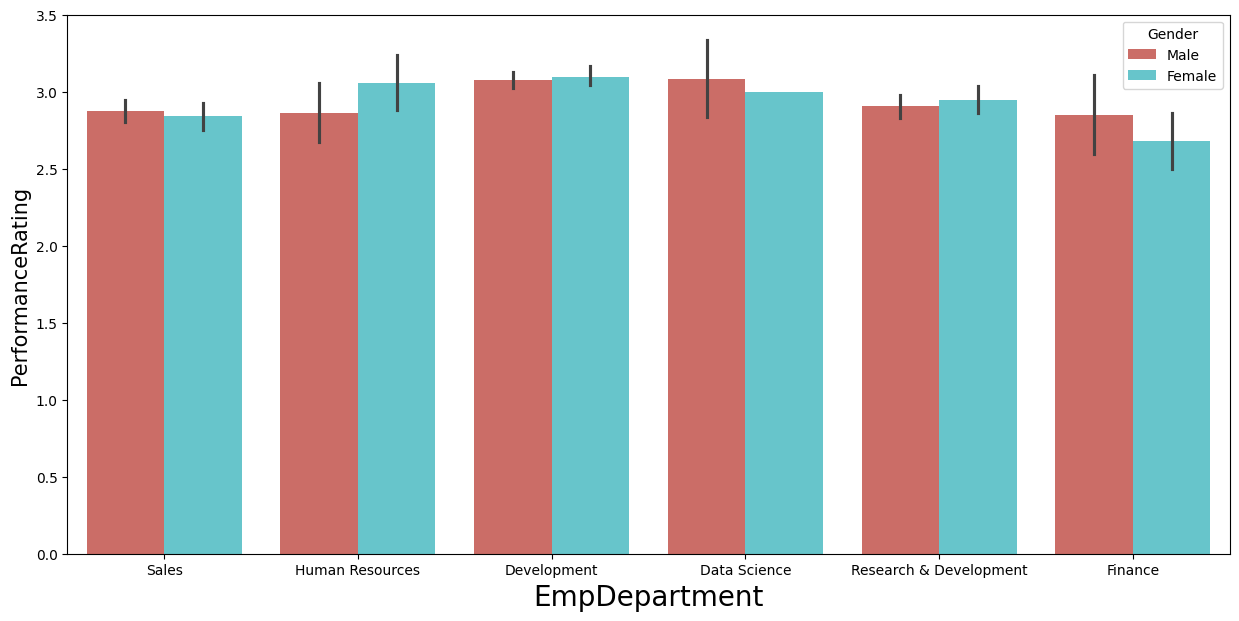

In [23]:
plt.figure(figsize=(15,7),facecolor='white')
sns.barplot(x='EmpDepartment',y='PerformanceRating',hue=data.Gender,data=data,palette='hls')
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()

Observations:

* There is less difference in performance rating between male and female






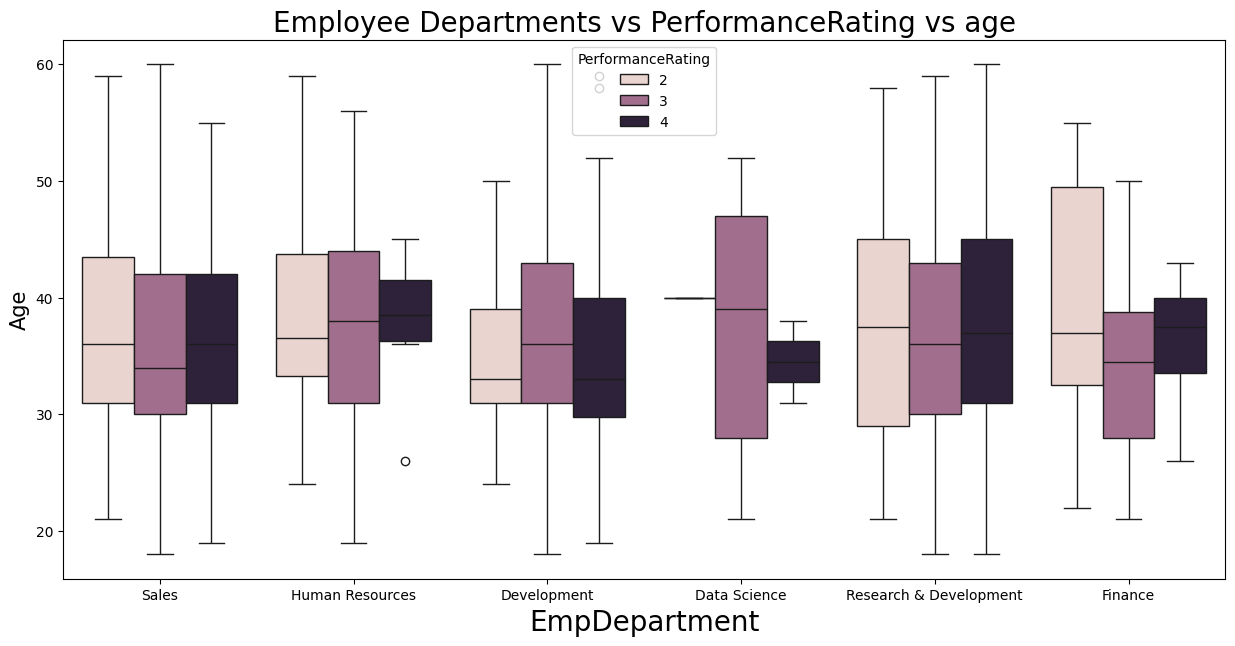

In [39]:
plt.figure(figsize=(15,7))
sns.boxplot(x='EmpDepartment',y='Age',hue=data.PerformanceRating,data=data)
plt.title('Employee Departments vs PerformanceRating vs age',fontsize=20)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('Age',fontsize=15)
plt.show()

* In finance department performance raring is less as the age increases

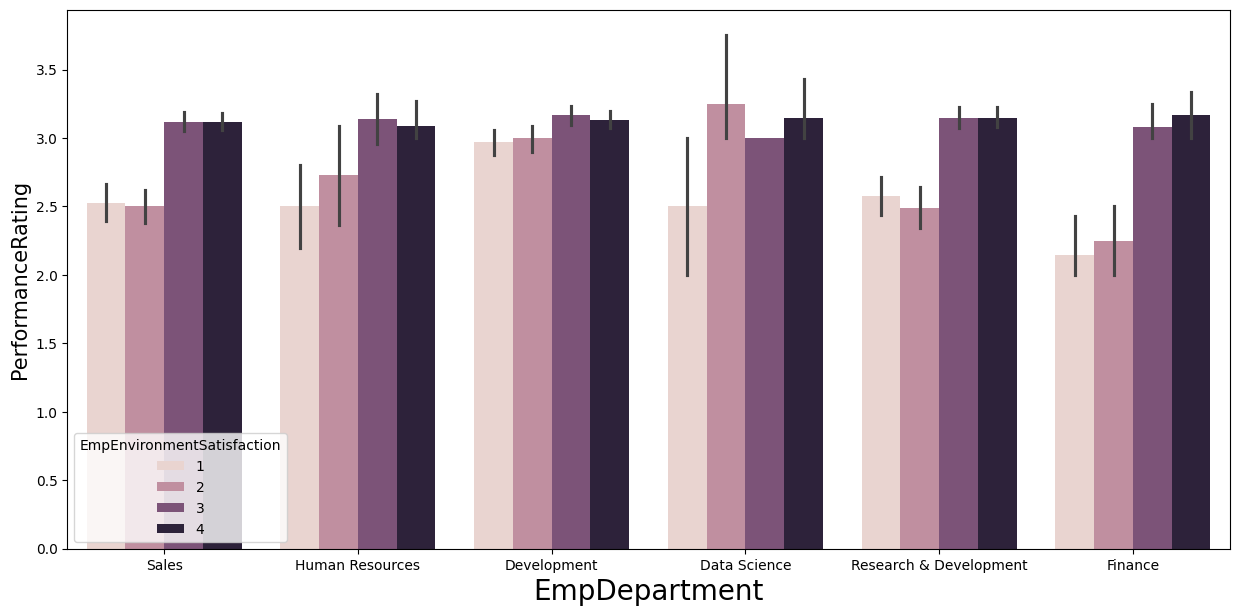

In [25]:
plt.figure(figsize=(15,7),facecolor='white')
sns.barplot(x='EmpDepartment',y='PerformanceRating',hue=data.EmpEnvironmentSatisfaction,data=data)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()

* Job environment statification will affect performance rating in all department.But in development department the cause is less than others

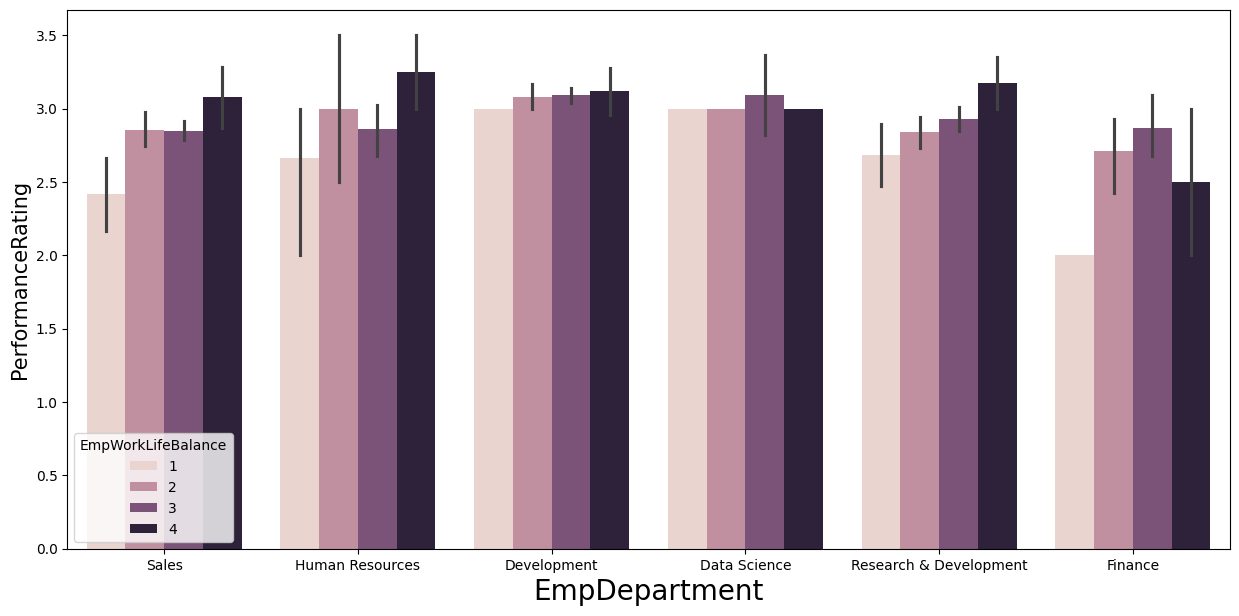

In [38]:
plt.figure(figsize=(15,7),facecolor='white')
sns.barplot(x='EmpDepartment',y='PerformanceRating',hue=data.EmpWorkLifeBalance,data=data)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()

* Other than data science and Develpoment departments employees worklife balance is affecting the performance.Worklife balance will affect performance of the employees

-->EmpDepartment v/s TrainingTimesLastYear v/s PerformanceRating


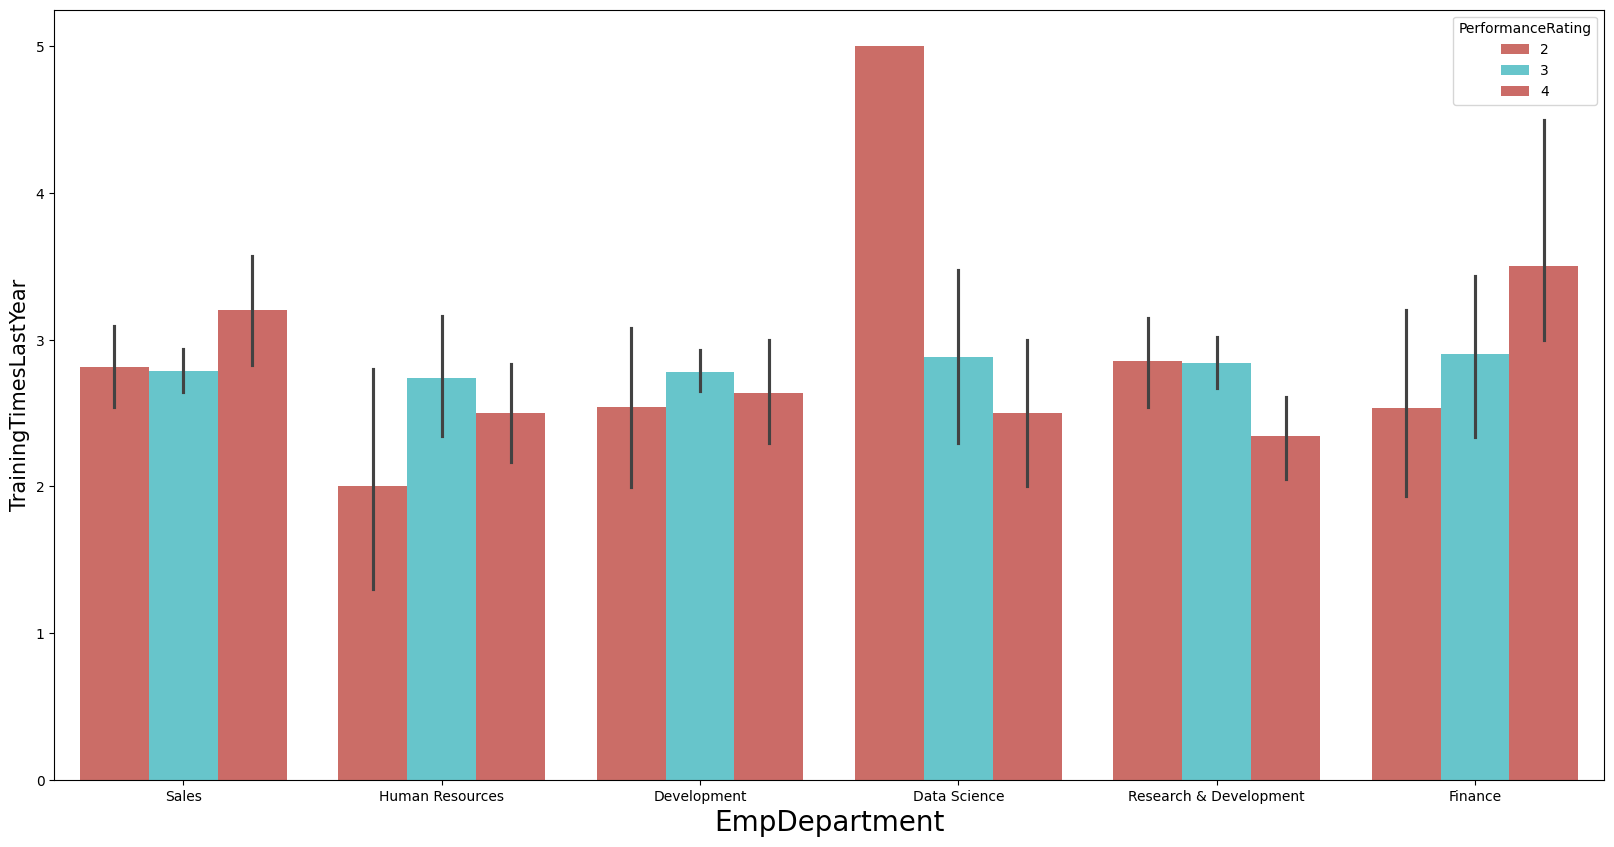

In [69]:
plt.figure(figsize=(20,10))
sns.barplot(x='EmpDepartment',y='TrainingTimesLastYear',hue=data.PerformanceRating,data=data,palette='hls')
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('TrainingTimesLastYear',fontsize=15)
plt.show()

* As the taining time increases the performance rating is increases in Finance,Human resource,Development and Sales
* In Datascience and Reearch & Development department employees performance rate is high for employees who attended less training.Employees having 4 rating as the training time decreases

**Conclusion**
* Some variables like Emp Environment Satisfaction,Emp Last Salary Hike Percent,Emp Work Life Balance has positive coorelation with target variable

